In [1]:
import numpy as np
import pandas as pd

!pip install openpyxl
!pip install geopandas
!pip install matplotlib


## 1. Hist de precios de venta Madrid

In [2]:
evolucion_precio = pd.ExcelFile(r"C:\Users\evahr\Downloads\TFM-idealista\Hist de precios de venta Madrid.xlsx")

print(evolucion_precio.sheet_names)  

['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín', 'Chamberí', 'Ciudad Lineal', 'Fuencarral-El Pardo', 'Hortaleza', 'Latina', 'Moncloa-Aravaca', 'Moratalaz', 'Puente de Vallecas', 'Retiro', 'Salamanca', 'San Blas-Canillejas', 'Tetuán', 'Usera', 'Vicálvaro', 'Villa de Vallecas', 'Villaverde']


In [3]:
# Leer cada hoja en un diccionario {nombre_distrito: DataFrame}
district_data = {
    sheet_name.strip(): evolucion_precio.parse(sheet_name)
    for sheet_name in evolucion_precio.sheet_names
}

In [4]:
# Crear diferentes Data Frame por cada distrito
# Crear diferentes DataFrame por cada distrito
df_arganzuela = evolucion_precio.parse("Arganzuela")
df_barajas = evolucion_precio.parse("Barajas")
df_carabanchel = evolucion_precio.parse("Carabanchel")
df_centro = evolucion_precio.parse("Centro")
df_chamartin = evolucion_precio.parse("Chamartín")
df_chamberi = evolucion_precio.parse("Chamberí")
df_ciudad_lineal = evolucion_precio.parse("Ciudad Lineal")
df_fuencarral = evolucion_precio.parse("Fuencarral-El Pardo")
df_hortaleza = evolucion_precio.parse("Hortaleza")
df_latina = evolucion_precio.parse("Latina")
df_moncloa = evolucion_precio.parse("Moncloa-Aravaca")
df_moratalaz = evolucion_precio.parse("Moratalaz")
df_puente_de_vallecas = evolucion_precio.parse("Puente de Vallecas")
df_retiro = evolucion_precio.parse("Retiro")
df_salamanca = evolucion_precio.parse("Salamanca")
df_san_blas = evolucion_precio.parse("San Blas-Canillejas")
df_tetuan = evolucion_precio.parse("Tetuán") 
df_usera = evolucion_precio.parse("Usera")
df_vicalvaro = evolucion_precio.parse("Vicálvaro")
df_villa_de_vallecas = evolucion_precio.parse("Villa de Vallecas")
df_villaverde = evolucion_precio.parse("Villaverde")


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Diccionario de dataframes por distrito
distritos = {
    "Arganzuela": df_arganzuela,
    "Barajas": df_barajas,
    "Carabanchel": df_carabanchel,
    "Centro": df_centro,
    "Chamartín": df_chamartin,
    "Chamberí": df_chamberi,
    "Ciudad Lineal": df_ciudad_lineal,
    "Fuencarral": df_fuencarral,
    "Hortaleza": df_hortaleza,
    "Latina": df_latina,
    "Moncloa": df_moncloa,
    "Moratalaz": df_moratalaz,
    "Puente de Vallecas": df_puente_de_vallecas,
    "Retiro": df_retiro,
    "Salamanca": df_salamanca,
    "San Blas": df_san_blas,
    "Tetuán": df_tetuan,
    "Usera": df_usera,
    "Vicálvaro": df_vicalvaro,
    "Villa de Vallecas": df_villa_de_vallecas,
    "Villaverde": df_villaverde
}

In [6]:
# Eliminar el símbolo €/m2, limpia puntos de miles y comas decimales
# Lista de variables de tus DataFrames
nombres_distritos = [
    'df_arganzuela', 'df_barajas', 'df_carabanchel', 'df_centro', 'df_chamartin',
    'df_chamberi', 'df_ciudad_lineal', 'df_fuencarral', 'df_hortaleza', 'df_latina',
    'df_moncloa', 'df_moratalaz', 'df_puente_de_vallecas', 'df_retiro', 'df_salamanca',
    'df_san_blas', 'df_tetuan', 'df_usera', 'df_vicalvaro', 'df_villa_de_vallecas', 'df_villaverde'
]

# Bucle para limpiar y convertir la columna 'Precio m2' en todos
for nombre in nombres_distritos:
    df = globals()[nombre]

    # Asegurarse de que la columna sea tipo texto
    df['Precio m2'] = df['Precio m2'].astype(str)

    # Limpiar símbolos y formato
    df['Precio m2'] = (
        df['Precio m2']
        .str.replace('€/m2', '', regex=False)
        .str.replace('.', '', regex=False)   
        .str.replace(',', '.', regex=False)  
    )

    # Convertir a float, 'nd' y errores serán NaN
    df['Precio m2'] = pd.to_numeric(df['Precio m2'], errors='coerce')

    # Eliminar filas con NaN en 'Precio m2'
    df.dropna(subset=['Precio m2'], inplace=True)

In [7]:
# Lista de variables de tus DataFrames
nombres_distritos = [
    'df_arganzuela', 'df_barajas', 'df_carabanchel', 'df_centro', 'df_chamartin',
    'df_chamberi', 'df_ciudad_lineal', 'df_fuencarral', 'df_hortaleza', 'df_latina',
    'df_moncloa', 'df_moratalaz', 'df_puente_de_vallecas', 'df_retiro', 'df_salamanca',
    'df_san_blas', 'df_tetuan', 'df_usera', 'df_vicalvaro', 'df_villa_de_vallecas', 'df_villaverde'
]

In [8]:
import pandas as pd

# Crear lista de tuplas con el nombre del distrito y su DataFrame ya existente
distritos = [
    ("Arganzuela", df_arganzuela),
    ("Barajas", df_barajas),
    ("Carabanchel", df_carabanchel),
    ("Centro", df_centro),
    ("Chamartín", df_chamartin),
    ("Chamberí", df_chamberi),
    ("Ciudad Lineal", df_ciudad_lineal),
    ("Fuencarral", df_fuencarral),
    ("Hortaleza", df_hortaleza),
    ("Latina", df_latina),
    ("Moncloa", df_moncloa),
    ("Moratalaz", df_moratalaz),
    ("Puente de Vallecas", df_puente_de_vallecas),
    ("Retiro", df_retiro),
    ("Salamanca", df_salamanca),
    ("San Blas", df_san_blas),
    ("Tetuán", df_tetuan),
    ("Usera", df_usera),
    ("Vicálvaro", df_vicalvaro),
    ("Villa de Vallecas", df_villa_de_vallecas),
    ("Villaverde", df_villaverde)
]

# Añadir columna "Distrito" y asegurar que "Mes" sea columna, no índice
dataframes = []
for nombre, df in distritos:
    df_mod = df.copy().reset_index()  
    df_mod["Distrito"] = nombre
    dataframes.append(df_mod)

# Unir todos
hist_precios_madrid = pd.concat(dataframes, ignore_index=True)

In [9]:
hist_precios_madrid = hist_precios_madrid.drop(columns=['index'])

In [10]:
hist_precios_madrid.head()

Mes  Precio m2 Variación mensual Variación trimestral  \
0 2025-06-01     5729.0              0.01                0.073   
1 2025-05-01     5669.0             0.036                0.068   
2 2025-04-01     5472.0             0.024                0.043   
3 2025-03-01     5341.0             0.006                0.036   
4 2025-02-01     5310.0             0.012                0.049   

  Variación anual    Distrito  
0           0.181  Arganzuela  
1           0.192  Arganzuela  
2           0.182  Arganzuela  
3           0.163  Arganzuela  
4           0.162  Arganzuela

In [11]:
distritos_lista = list(hist_precios_madrid["Distrito"].unique())
print(distritos_lista)


['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín', 'Chamberí', 'Ciudad Lineal', 'Fuencarral', 'Hortaleza', 'Latina', 'Moncloa', 'Moratalaz', 'Puente de Vallecas', 'Retiro', 'Salamanca', 'San Blas', 'Tetuán', 'Usera', 'Vicálvaro', 'Villa de Vallecas', 'Villaverde']


In [12]:
# Convertimos la columna Precio m2 a numérica por si aún tiene texto
hist_precios_madrid["Precio m2"] = pd.to_numeric(
    hist_precios_madrid["Precio m2"], errors="coerce"
)

# Sacar describe por distrito
describe_por_distrito = hist_precios_madrid.groupby("Distrito")["Precio m2"].describe()

print(describe_por_distrito)


                    count         mean          std     min      25%     50%  \
Distrito                                                                       
Arganzuela          212.0  3656.174528   693.991459  2658.0  3009.25  3664.5   
Barajas             206.0  3101.271845   384.311705  2546.0  2704.75  3163.0   
Carabanchel         218.0  2243.949541   441.483739  1601.0  1853.00  2177.0   
Centro              217.0  4426.686636   902.037716  3248.0  3731.00  4294.0   
Chamartín           213.0  4804.633803   737.875135  3864.0  4223.00  4688.0   
Chamberí            210.0  4855.171429   996.517313  3562.0  3994.25  4704.5   
Ciudad Lineal       216.0  3006.333333   442.844621  2393.0  2556.75  3012.0   
Fuencarral          215.0  3352.706977   437.548152  2713.0  2968.50  3369.0   
Hortaleza           213.0  3487.281690   483.150476  2739.0  3012.00  3535.0   
Latina              212.0  2284.872642   437.157219  1608.0  1877.50  2288.5   
Moncloa             215.0  3785.823256  

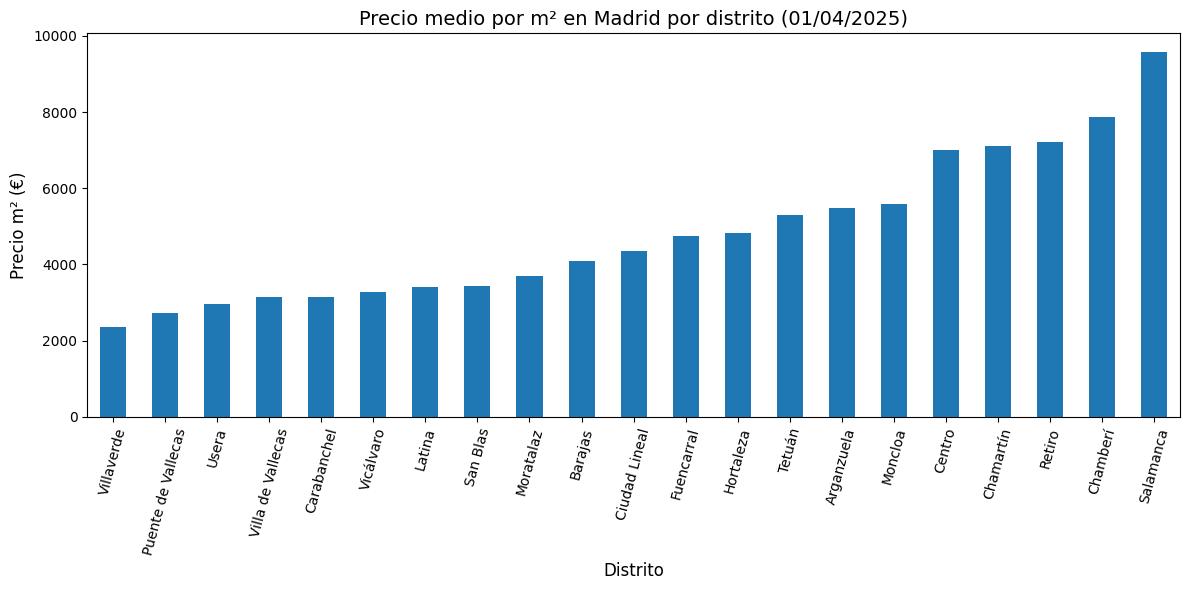

In [13]:
import matplotlib.pyplot as plt

# Aseguramos que la columna fecha está en formato datetime
hist_precios_madrid["Mes"] = pd.to_datetime(hist_precios_madrid["Mes"], errors="coerce")

# Filtrar solo la fecha 01/04/2025
filtro = hist_precios_madrid[hist_precios_madrid["Mes"] == "2025-04-01"]

# Agrupar por distrito y calcular el precio medio ese día 
precios_distrito = filtro.groupby("Distrito")["Precio m2"].mean().sort_values()

# Graficar
plt.figure(figsize=(12,6))
precios_distrito.plot(kind="bar")

plt.title("Precio medio por m² en Madrid por distrito (01/04/2025)", fontsize=14)
plt.ylabel("Precio m² (€)", fontsize=12)
plt.xlabel("Distrito", fontsize=12)
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


<Figure size 3000x4000 with 0 Axes>

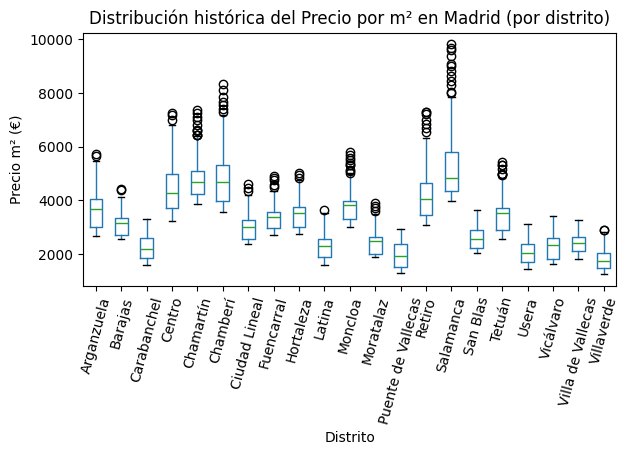

In [14]:
import matplotlib.pyplot as plt

# Aseguramos que "Precio m2" es numérico
hist_precios_madrid["Precio m2"] = pd.to_numeric(
    hist_precios_madrid["Precio m2"], errors="coerce"
)

# Boxplot para toda la serie temporal (varios años)
plt.figure(figsize=(30,40))
hist_precios_madrid.boxplot(column="Precio m2", by="Distrito", grid=False, rot=75)

plt.title("Distribución histórica del Precio por m² en Madrid (por distrito)")
plt.suptitle("")  # eliminar el título extra
plt.ylabel("Precio m² (€)")
plt.xlabel("Distrito")

plt.tight_layout()
plt.show()



## Nº de outliers

In [15]:
# Aseguramos que Precio m2 es numérico
hist_precios_madrid["Precio m2"] = pd.to_numeric(hist_precios_madrid["Precio m2"], errors="coerce")

outliers_count = {}

# Recorremos distrito a distrito
for distrito, datos in hist_precios_madrid.groupby("Distrito"):
    serie = datos["Precio m2"].dropna()
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = serie[(serie < lower) | (serie > upper)]
    outliers_count[distrito] = len(outliers)

# Convertimos a DataFrame y lo mostramos
outliers_df = pd.DataFrame.from_dict(outliers_count, orient="index", columns=["N_outliers"]).sort_values("N_outliers", ascending=False)

outliers_df


N_outliers
Salamanca                   12
Chamartín                   11
Moncloa                     10
Tetuán                       8
Chamberí                     7
Retiro                       7
Fuencarral                   5
Moratalaz                    4
Centro                       3
Ciudad Lineal                3
Hortaleza                    3
Arganzuela                   2
Barajas                      2
Villaverde                   2
Latina                       1
Carabanchel                  0
Puente de Vallecas           0
San Blas                     0
Usera                        0
Vicálvaro                    0
Villa de Vallecas            0

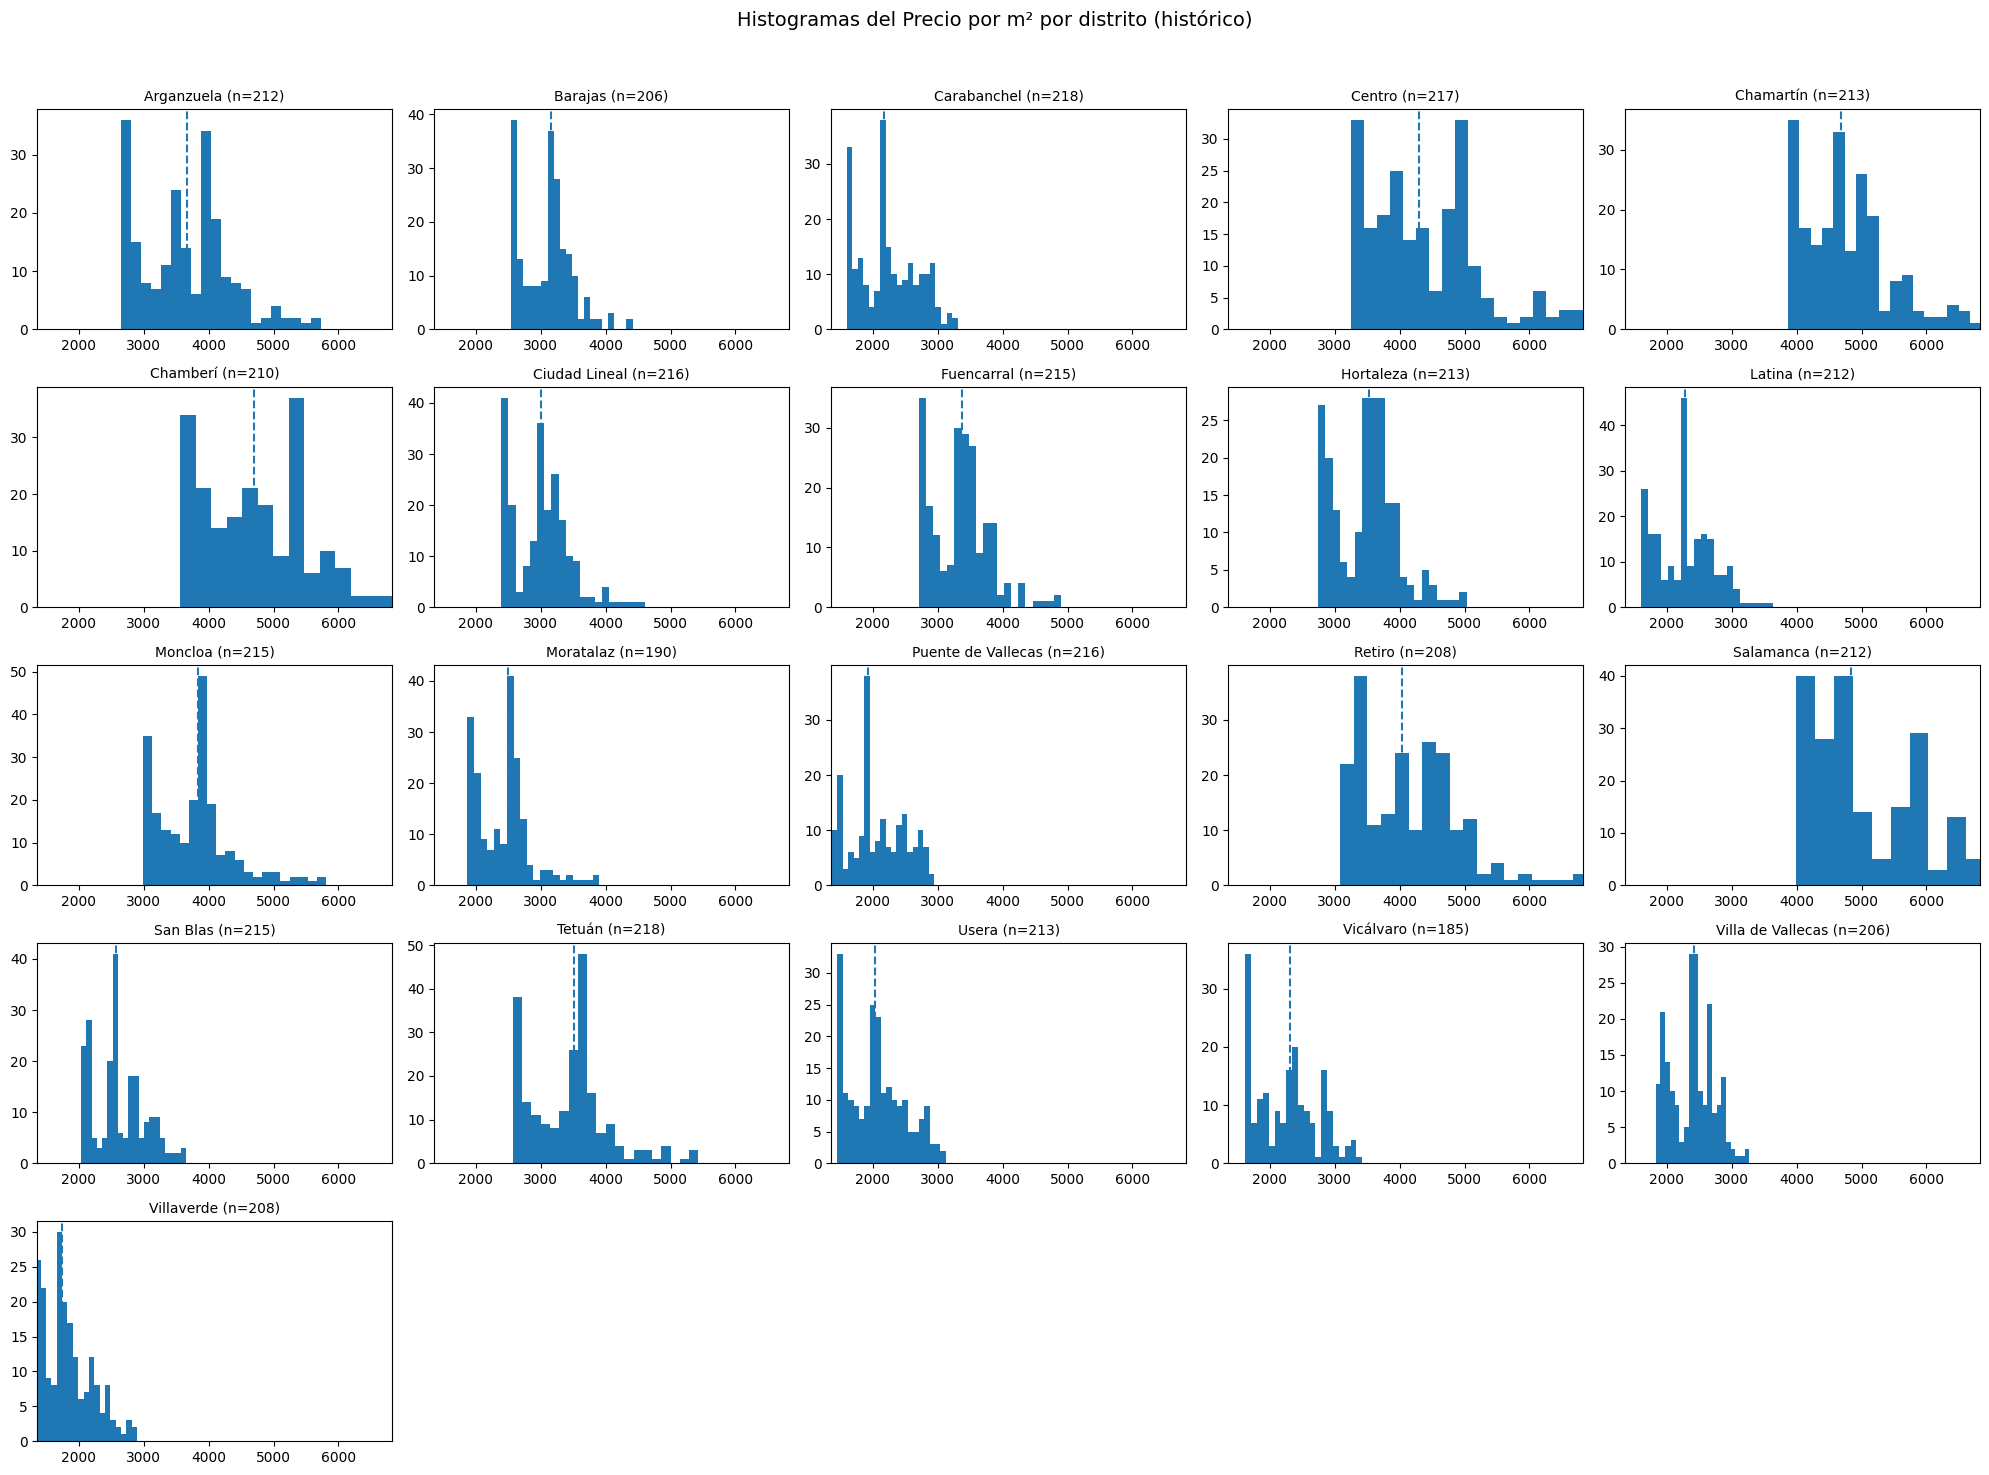

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Asegura tipos
hist_precios_madrid["Mes"] = pd.to_datetime(hist_precios_madrid["Mes"], errors="coerce")
hist_precios_madrid["Precio m2"] = pd.to_numeric(hist_precios_madrid["Precio m2"], errors="coerce")


# Sin filtro (todo el histórico):
hist = hist_precios_madrid.copy()

# Lista de distritos
distritos = sorted(hist["Distrito"].dropna().unique())

# Parámetros del panel
n = len(distritos)
ncols = 5
nrows = math.ceil(n / ncols)

serie_global = hist["Precio m2"].dropna()
xmin = np.nanpercentile(serie_global, 1)
xmax = np.nanpercentile(serie_global, 99)

# Crear figura
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*3), squeeze=False)

for i, distrito in enumerate(distritos):
    r, c = divmod(i, ncols)
    ax = axes[r, c]

    s = hist.loc[hist["Distrito"] == distrito, "Precio m2"].dropna()
    ax.hist(s, bins=20)
    ax.set_title(f"{distrito} (n={len(s)})", fontsize=10)
    ax.set_xlim(xmin, xmax)
    ax.tick_params(axis='x', labelrotation=0)

    # Línea de mediana para cada distrito
    if len(s) > 0:
        med = float(np.nanmedian(s))
        ax.axvline(med, linestyle='--')

# Quitar ejes vacíos si el grid es mayor que n
for j in range(i+1, nrows*ncols):
    r, c = divmod(j, ncols)
    axes[r, c].axis('off')

fig.suptitle("Histogramas del Precio por m² por distrito (histórico)", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


📌 Observaciones destacadas

**Distritos de gama alta:**

Salamanca, Chamartín, Chamberí, Retiro, Centro → distribuciones centradas en precios altos (≈4.000–6.000 €/m², con colas hasta 8.000–9.000).

Además, presentan cola derecha larga: hay pisos con precios extraordinariamente altos (probablemente viviendas de lujo o anuncios con sesgo).

**Distritos intermedios:**

Moncloa, Arganzuela, Ciudad Lineal, Hortaleza, Tetuán, Latina → rangos medios, entre 3.000–4.500 €/m².

Distribuciones con cierta dispersión → reflejan mezcla de barrios caros y otros más asequibles dentro del mismo distrito.

**Distritos más asequibles:**

Villaverde, Puente de Vallecas, Villa de Vallecas, Usera, San Blas, Vicálvaro → la mayor parte de los precios está en el rango 1.800–3.000 €/m².

Distribuciones más concentradas, indicando un mercado más homogéneo.

Barajas y Moratalaz:

Muestran distribuciones más estrechas en torno a 2.500–3.500 €/m².

Sugieren estabilidad y menos extremos en comparación con otros distritos.

🧠 Insight

Evidente polarización del mercado inmobiliario en Madrid: distritos de lujo con precios muy elevados y dispersos frente a zonas periféricas con precios más bajos y homogéneos.

La asimetría (colas largas hacia la derecha) indica que existen propiedades premium que tiran hacia arriba las medias en distritos caros → conviene reportar medianas además de medias para no sesgar el análisis.

Este panel refuerza la narrativa de la desigualdad geográfica en el acceso a vivienda en Madrid.

C:\Users\evahr\AppData\Local\Temp\ipykernel_23052\3319063319.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab20', len(distritos))  # 20 colores bien diferenciados


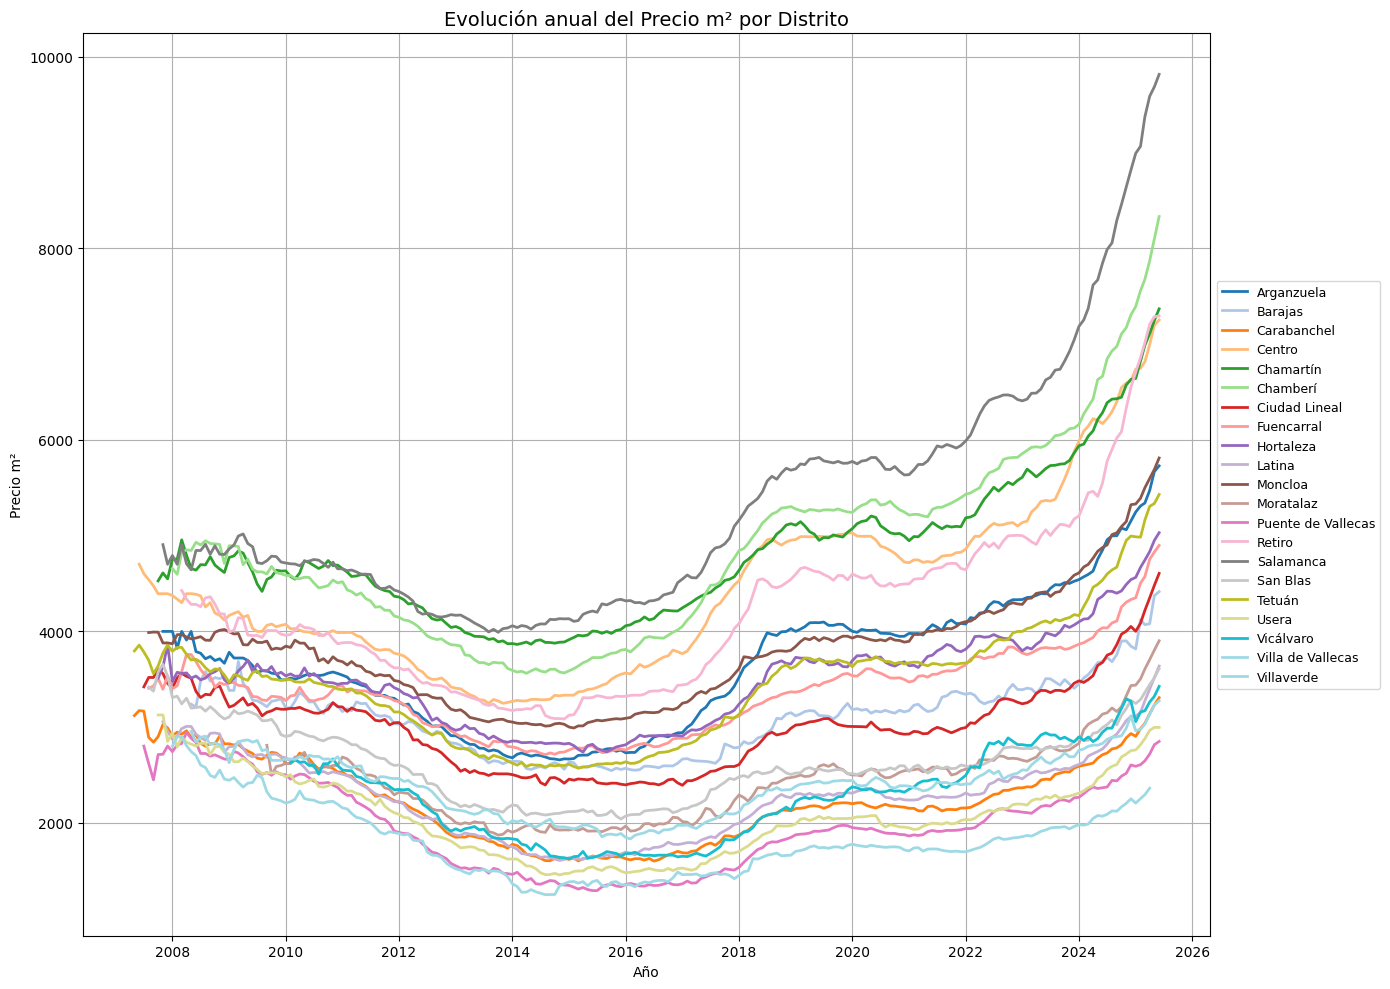

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Diccionario de dataframes por distrito
distritos = {
    "Arganzuela": df_arganzuela,
    "Barajas": df_barajas,
    "Carabanchel": df_carabanchel,
    "Centro": df_centro,
    "Chamartín": df_chamartin,
    "Chamberí": df_chamberi,
    "Ciudad Lineal": df_ciudad_lineal,
    "Fuencarral": df_fuencarral,
    "Hortaleza": df_hortaleza,
    "Latina": df_latina,
    "Moncloa": df_moncloa,
    "Moratalaz": df_moratalaz,
    "Puente de Vallecas": df_puente_de_vallecas,
    "Retiro": df_retiro,
    "Salamanca": df_salamanca,
    "San Blas": df_san_blas,
    "Tetuán": df_tetuan,
    "Usera": df_usera,
    "Vicálvaro": df_vicalvaro,
    "Villa de Vallecas": df_villa_de_vallecas,
    "Villaverde": df_villaverde
}

# Paleta de colores más clara y visual
colormap = cm.get_cmap('tab20', len(distritos))  

# Crear gráfico
plt.figure(figsize=(14, 10))

for i, (nombre, df) in enumerate(distritos.items()):
    df = df.copy()
    df['Mes'] = pd.to_datetime(df['Mes'])
    df.set_index('Mes', inplace=True)
    df['Precio m2'] = pd.to_numeric(df['Precio m2'], errors='coerce')

    # Plot con color diferenciado
    plt.plot(df.index, df['Precio m2'], label=nombre, color=colormap(i),linewidth=2)

# Personalización
plt.title("Evolución anual del Precio m² por Distrito", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Precio m²")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\evahr\AppData\Local\Temp\ipykernel_23052\209620299.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab20', len(distritos))  # 20 colores bien diferenciados


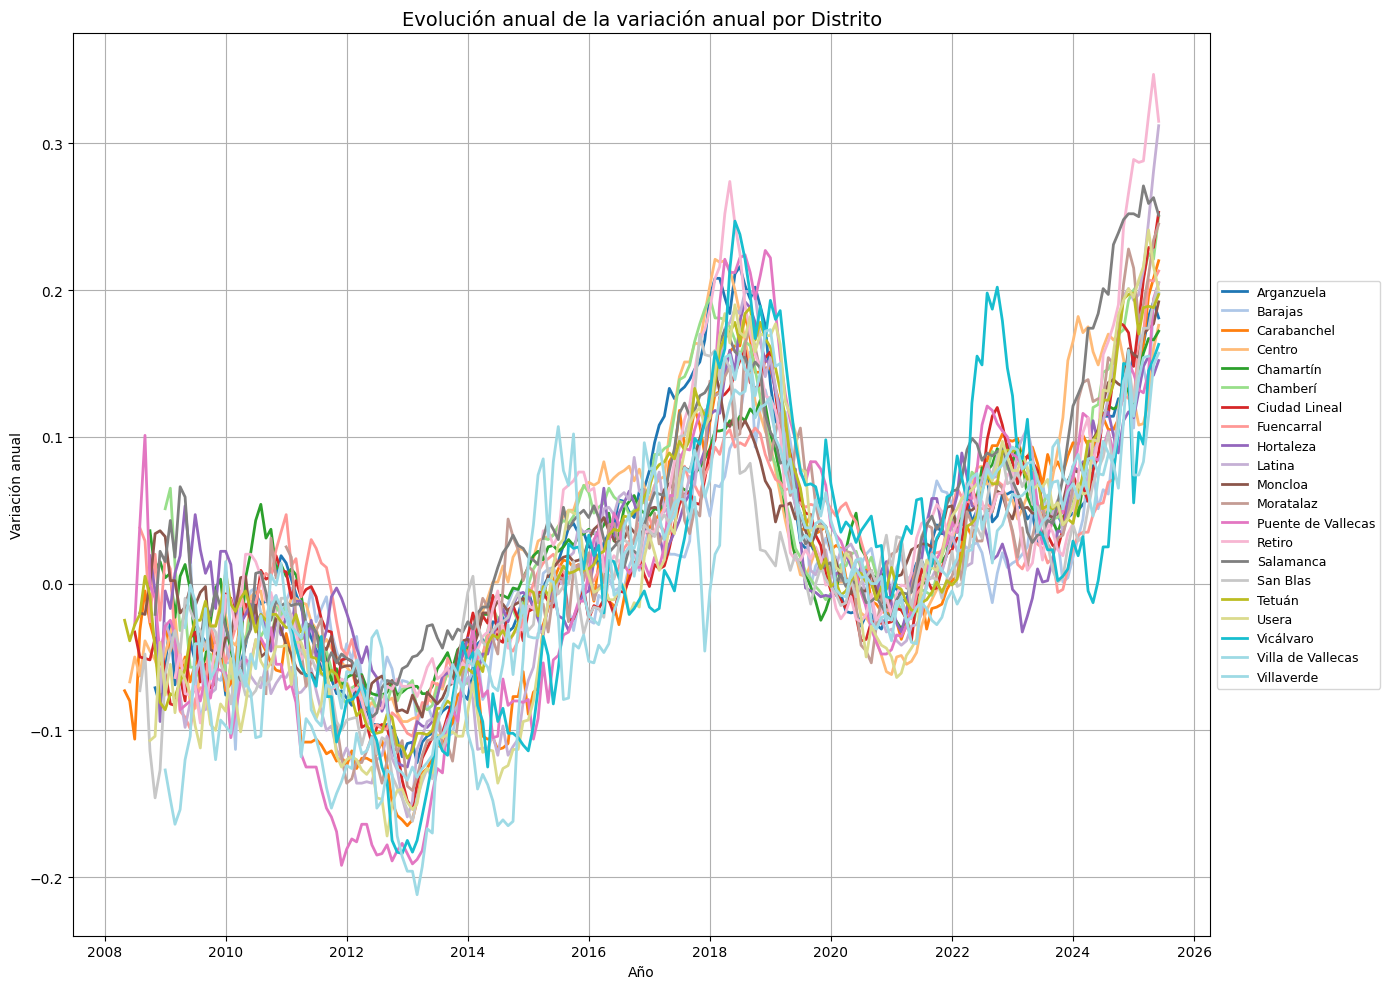

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Diccionario de dataframes por distrito
distritos = {
    "Arganzuela": df_arganzuela,
    "Barajas": df_barajas,
    "Carabanchel": df_carabanchel,
    "Centro": df_centro,
    "Chamartín": df_chamartin,
    "Chamberí": df_chamberi,
    "Ciudad Lineal": df_ciudad_lineal,
    "Fuencarral": df_fuencarral,
    "Hortaleza": df_hortaleza,
    "Latina": df_latina,
    "Moncloa": df_moncloa,
    "Moratalaz": df_moratalaz,
    "Puente de Vallecas": df_puente_de_vallecas,
    "Retiro": df_retiro,
    "Salamanca": df_salamanca,
    "San Blas": df_san_blas,
    "Tetuán": df_tetuan,
    "Usera": df_usera,
    "Vicálvaro": df_vicalvaro,
    "Villa de Vallecas": df_villa_de_vallecas,
    "Villaverde": df_villaverde
}

# Paleta de colores más clara y visual
colormap = cm.get_cmap('tab20', len(distritos))  

# Crear gráfico
plt.figure(figsize=(14, 10))

for i, (nombre, df) in enumerate(distritos.items()):
    df = df.copy()
    df['Mes'] = pd.to_datetime(df['Mes'])
    df.set_index('Mes', inplace=True)
    df['Precio m2'] = pd.to_numeric(df['Variación anual'], errors='coerce')

    # Plot con color diferenciado
    plt.plot(df.index, df['Precio m2'], label=nombre, color=colormap(i),linewidth=2)

# Personalización
plt.title("Evolución anual de la variación anual por Distrito", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Variación anual")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Distritos latitud - longitud

In [19]:
lat_long = pd.read_csv(r"C:\Users\evahr\Downloads\TFM-idealista\Distritos_Lat_Lon.csv", sep=';')

lat_long.head(10)

DISTRITO    LATITUD  LONGITUD
0               Centro   40.41831  -3.70275
1           Arganzuela   40.40021  -3.69618
2               Retiro  40.41317   -3.68307
3            Salamanca  40.42972   -3.67975
4            Chamartín   40.46206  -3.67660
5               Tetuan   40.45975  -3.69750
6             Chamberi   40.43404  -3.70379
7  Fuencarral-El Pardo   40.4984   -3.73140
8      Moncloa-Aravaca   40.43547  -3.73170
9               Latina   40.38897  -3.74569

## 3. Distritos

In [20]:
distritos = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Distritos.xlsx")

In [21]:
distritos.rename(columns={'NOMBRE': 'DISTRITO'}, inplace=True)

In [22]:
distritos.head(10)

Shape_Leng    Shape_Area  COD_DIS  COD_DIS_TX             DISTRITO  \
0  10304.082346  5.228246e+06        1           1               Centro   
1  12806.765287  6.462176e+06        2           2           Arganzuela   
2   9523.887357  5.466211e+06        3           3               Retiro   
3  10866.335995  5.392404e+06        4           4            Salamanca   
4  13396.817759  9.175482e+06        5           5            Chamartín   
5   9919.063144  5.374725e+06        6           6               Tetuan   
6   9019.544152  4.679185e+06        7           7             Chamberi   
7  94480.909361  2.378383e+08        8           8  Fuencarral-El Pardo   
8  41016.912066  4.658695e+07        9           9      Moncloa-Aravaca   
9  28142.972535  2.541039e+07       10          10               Latina   

              DISTRI_MAY              DISTRI_MT  FCH_ALTA  FCH_BAJA  \
0                 CENTRO                 CENTRO       NaN       NaN   
1             ARGANZUELA             ARGANZUELA       NaN       NaN   
2                 RETIRO                 RETIRO       NaN       NaN   
3              SALAMANCA              SALAMANCA       NaN       NaN   
4              CHAMARTIN              CHAMARTÍN       NaN       NaN   
5                 TETUAN                 TETUÁN       NaN       NaN   
6               CHAMBERI               CHAMBERÍ       NaN       NaN   
7  FUENCARRAL - EL PARDO  FUENCARRAL - EL PARDO       NaN       NaN   
8      MONCLOA - ARAVACA      MONCLOA - ARAVACA       NaN       NaN   
9                 LATINA                 LATINA       NaN       NaN   

   OBSERVACIONES  ACUERDO  
0            NaN      NaN  
1            NaN      NaN  
2            NaN      NaN  
3            NaN      NaN  
4            NaN      NaN  
5            NaN      NaN  
6            NaN      NaN  
7            NaN      NaN  
8            NaN      NaN  
9            NaN      NaN

## 4. Precio viviendas distritos

In [23]:
precio_distritos = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Precio_viviendas_distritos.xlsx")

precio_distritos.head(10)

Año             Distrito Enero Febrero Marzo Abril Mayo Junio Julio  \
0  2006     Ciudad de Madrid    ..      ..    ..    ..   ..    ..    ..   
1  2006               Centro    ..      ..    ..    ..   ..    ..    ..   
2  2006           Arganzuela    ..      ..    ..    ..   ..    ..    ..   
3  2006               Retiro    ..      ..    ..    ..   ..    ..    ..   
4  2006            Salamanca    ..      ..    ..    ..   ..    ..    ..   
5  2006            Chamartín    ..      ..    ..    ..   ..    ..    ..   
6  2006               Tetuán    ..      ..    ..    ..   ..    ..    ..   
7  2006             Chamberí    ..      ..    ..    ..   ..    ..    ..   
8  2006  Fuencarral-El Pardo    ..      ..    ..    ..   ..    ..    ..   
9  2006      Moncloa-Aravaca    ..      ..    ..    ..   ..    ..    ..   

  Agosto Septiembre Octubre Noviembre Diciembre  
0     ..         ..      ..        ..        ..  
1     ..         ..      ..        ..        ..  
2     ..         ..      ..        ..        ..  
3     ..         ..      ..        ..        ..  
4     ..         ..      ..        ..        ..  
5     ..         ..      ..        ..        ..  
6     ..         ..      ..        ..        ..  
7     ..         ..      ..        ..        ..  
8     ..         ..      ..        ..        ..  
9     ..         ..      ..        ..        ..

## 5. Ranking vulnerabilidad distritos

In [24]:
ranking = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Ranking_Vulnerabilidad_Distritos.xlsx")

ranking.head(10)

Año  Ranking             Distrito  Vulnerabilidad
0  2020        1   Puente de Vallecas        0.011033
1  2020        2           Villaverde        0.010210
2  2020        3                Usera        0.010118
3  2020        4          Carabanchel        0.009590
4  2020        5               Latina        0.008578
5  2020        6    Villa de Vallecas        0.008818
6  2020        7  San Blas-Canillejas        0.008328
7  2020        8               Tetuán        0.008002
8  2020        9            Moratalaz        0.007922
9  2020       10            Vicálvaro        0.008100

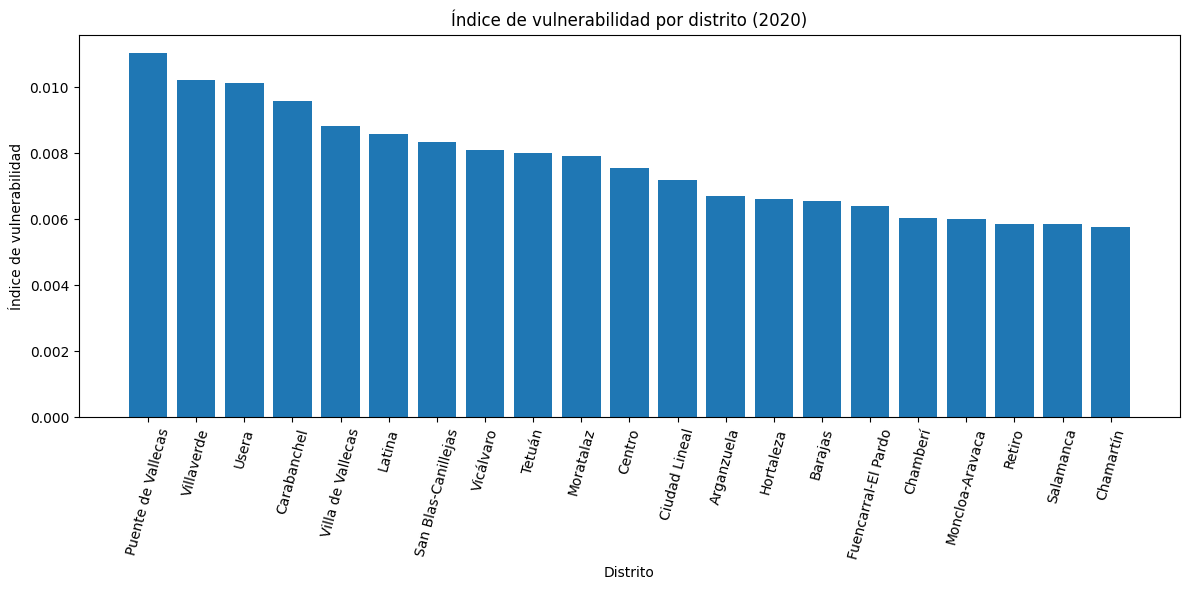

In [25]:
# Aseguramos que la columna vulnerabilidad se identifica (busca por nombre)
col_vuln = next(c for c in ranking.columns if 'vulner' in str(c).lower())

# Filtrar año 2020
ranking_2020 = ranking[ranking["Año"] == 2020].copy()

# Limpiar nombres de distrito 
ranking_2020["Distrito"] = (
    ranking_2020["Distrito"]
    .astype(str)
    .str.replace(r'^\s*\d+\s*', '', regex=True)
    .str.strip()
)

# Ordenar de mayor a menor vulnerabilidad
ranking_2020 = ranking_2020.sort_values(col_vuln, ascending=False)

# Gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(ranking_2020["Distrito"], ranking_2020[col_vuln])

plt.title("Índice de vulnerabilidad por distrito (2020)")
plt.ylabel("Índice de vulnerabilidad")
plt.xlabel("Distrito")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()



## 6. Histórico Euribor

In [26]:
euribor = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Euribor Histórico.xlsx")

euribor.head(10)

Año        Mes    Valor
0  2025     Agosto  0.02130
1  2025      Julio  0.02079
2  2025      Junio  0.02081
3  2025       Mayo  0.02080
4  2025      Abril  0.02143
5  2025      Marzo  0.02398
6  2025    Febrero  0.02402
7  2025      Enero  0.02526
8  2024  Diciembre  0.02433
9  2024  Noviembre  0.02506

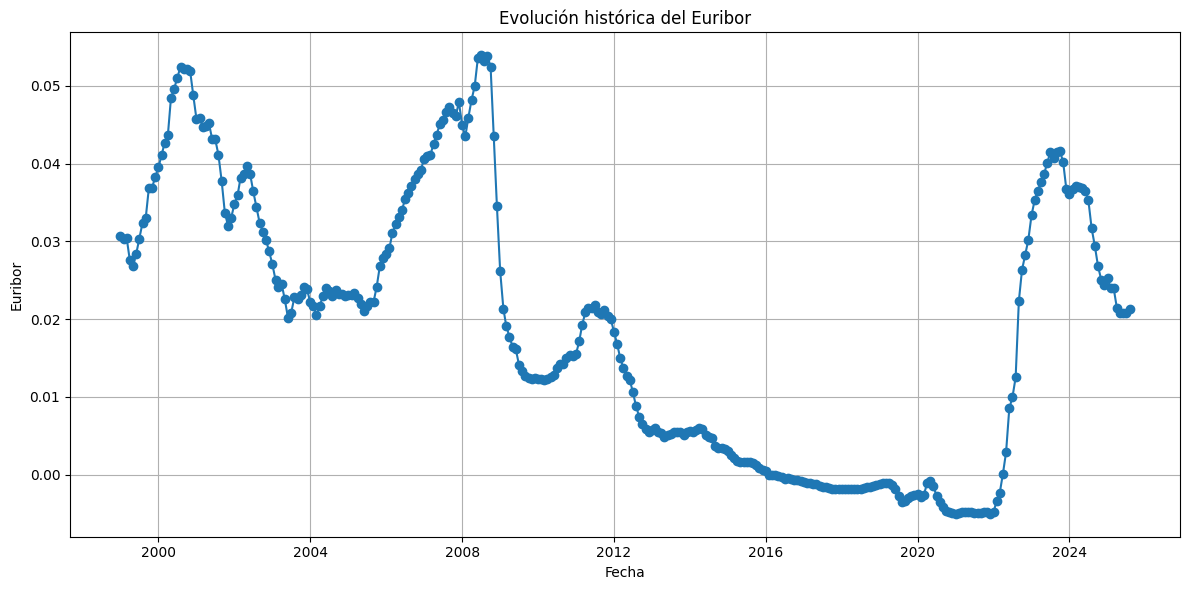

In [27]:
# Diccionario para pasar de nombre de mes a número
meses = {
    "Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4,
    "Mayo": 5, "Junio": 6, "Julio": 7, "Agosto": 8,
    "Septiembre": 9, "Octubre": 10, "Noviembre": 11, "Diciembre": 12
}

euribor = euribor.copy()
euribor["Mes_num"] = euribor["Mes"].map(meses)

# Crear columna de fecha (primer día de cada mes)
euribor["Fecha"] = pd.to_datetime(dict(year=euribor["Año"], month=euribor["Mes_num"], day=1))

# Ordenar por fecha
euribor = euribor.sort_values("Fecha")

# Graficar
plt.figure(figsize=(12,6))
plt.plot(euribor["Fecha"], euribor["Valor"], marker="o")

plt.title("Evolución histórica del Euribor")
plt.xlabel("Fecha")
plt.ylabel("Euribor")
plt.grid(True)
plt.tight_layout()
plt.show()


## 7. Transmisiones de propiedad de viviendas a través de compraventa en Comunidad de Madrid

In [28]:
transmisiones = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Transmisiones de propiedad de viviendas a través de compraventa en Comunidad de Madrid.xlsx")

transmisiones.head(10)

Año         Mes  Dato  T1_1 T1_12
0  2007-01-01 00:00:00       enero  7978   NaN   NaN
1  2007-01-02 00:00:00     febrero  8214     3   NaN
2  2007-01-03 00:00:00       marzo  8174  -0.5   NaN
3  2007-01-04 00:00:00       abril  6973 -14.7   NaN
4  2007-01-05 00:00:00        mayo  7678  10.1   NaN
5  2007-01-06 00:00:00       junio  7504  -2.3   NaN
6  2007-01-07 00:00:00       julio  7309  -2.6   NaN
7  2007-01-08 00:00:00      agosto  6590  -9.8   NaN
8  2007-01-09 00:00:00  septiembre  7528  14.2   NaN
9  2007-01-10 00:00:00     octubre  6347 -15.7   NaN

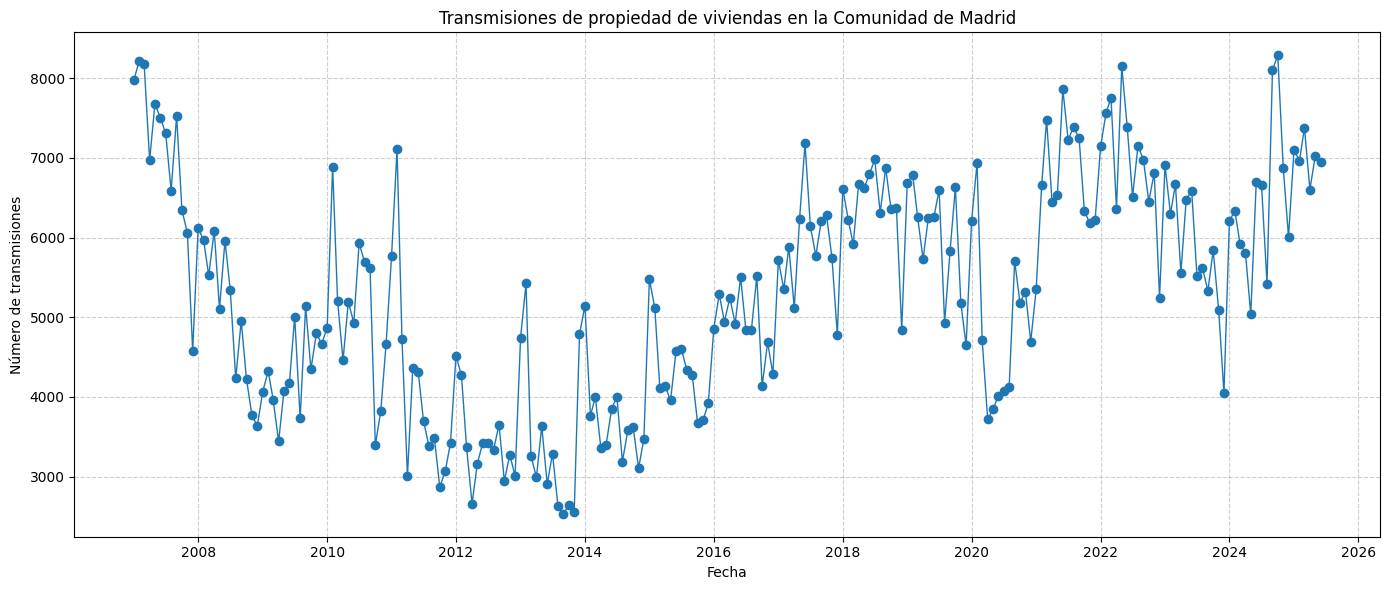

In [29]:
df = transmisiones.copy()

# Diccionario meses en español → número
meses = {
    "enero": 1, "febrero": 2, "marzo": 3, "abril": 4,
    "mayo": 5, "junio": 6, "julio": 7, "agosto": 8,
    "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12
}

# Año como entero
df["Año"] = pd.to_datetime(df["Año"], errors="coerce").dt.year

# Crear columna fecha
df["Mes_num"] = df["Mes"].map(meses)
df["Fecha"] = pd.to_datetime(dict(year=df["Año"], month=df["Mes_num"], day=1))

# 🔹 Limpiar la columna Dato (quitar todo lo que no sea número o punto)
df["Dato"] = df["Dato"].astype(str).str.replace(r"[^\d.,-]", "", regex=True)

# Convertir a float (cambiando comas por puntos si hay)
df["Dato"] = df["Dato"].str.replace(",", ".", regex=False)
df["Dato"] = pd.to_numeric(df["Dato"], errors="coerce")

# Ordenar
df = df.sort_values("Fecha")

# Gráfico de líneas
plt.figure(figsize=(14,6))
plt.plot(df["Fecha"], df["Dato"], marker="o", linewidth=1)

plt.title("Transmisiones de propiedad de viviendas en la Comunidad de Madrid")
plt.xlabel("Fecha")
plt.ylabel("Número de transmisiones")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



## 8. índice de precios de vivienda en la Comunidad de Madrid

In [30]:
precios_vivienda = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Índice de Precios de Vivienda en Comunidad de Madrid.xlsx")

precios_vivienda.head(10)

Año     Trimestre    Dato  T1_1  T1_4
0 2007-01-01  1º trimestre  157.23   NaN   NaN
1 2007-01-02  2º trimestre  160.67   2.2   NaN
2 2007-01-03  3º trimestre  161.26   0.4   NaN
3 2007-01-04  4º trimestre  154.51  -4.2   NaN
4 2008-01-01  1º trimestre  152.90  -1.0  -2.8
5 2008-01-02  2º trimestre  153.00   0.1  -4.8
6 2008-01-03  3º trimestre  149.95  -2.0  -7.0
7 2008-01-04  4º trimestre  141.98  -5.3  -8.1
8 2009-01-01  1º trimestre  135.80  -4.4 -11.2
9 2009-01-02  2º trimestre  134.05  -1.3 -12.4

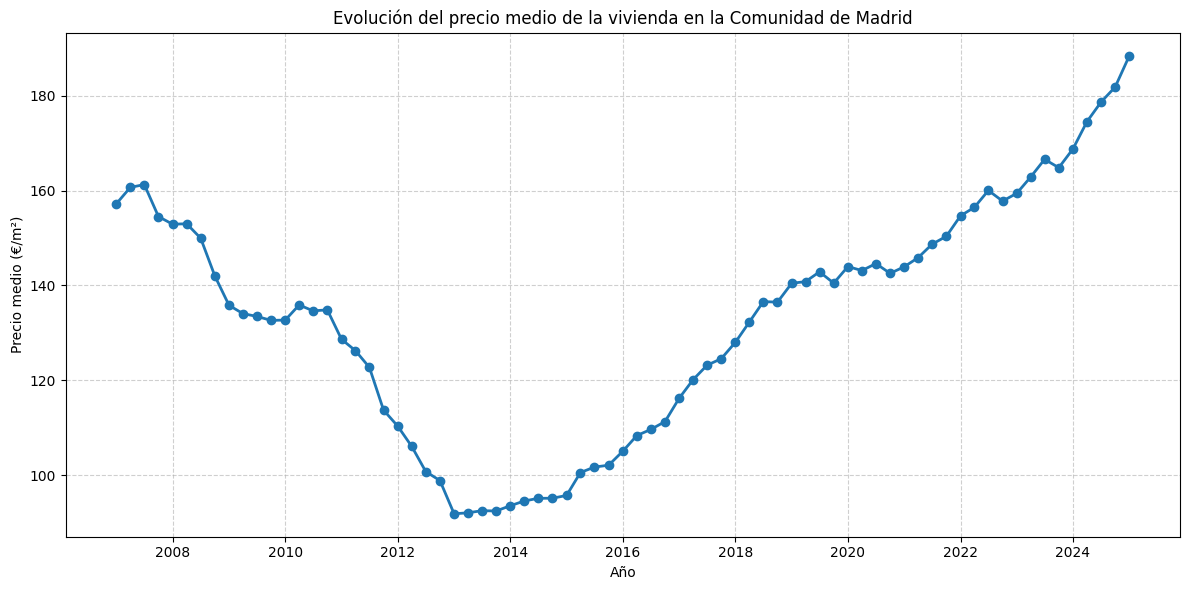

In [31]:
pv = precios_vivienda.copy()

# Diccionario: trimestre → mes representativo
trimestres = {
    "1º trimestre": 1,
    "2º trimestre": 4,
    "3º trimestre": 7,
    "4º trimestre": 10
}

# Crear columna de fecha combinando año + mes representativo
pv["Mes_num"] = pv["Trimestre"].map(trimestres)
pv["Fecha"] = pd.to_datetime(dict(year=pd.to_datetime(pv["Año"]).dt.year,
                                  month=pv["Mes_num"], day=1))

# Ordenar por fecha
pv = pv.sort_values("Fecha")

# Gráfico de líneas
plt.figure(figsize=(12,6))
plt.plot(pv["Fecha"], pv["Dato"], marker="o", linewidth=2)

plt.title("Evolución del precio medio de la vivienda en la Comunidad de Madrid")
plt.xlabel("Año")
plt.ylabel("Precio medio (€/m²)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## 9. Capital total hipotecado en la Comunidad de Madrid

In [32]:
capital_hipotecado = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Capital total hipotecado en Comunidad de Madrid.xlsx")

capital_hipotecado.head(10)

AÑO         MES       DATO  T1_1  T1_12
0 2007-01-01       enero  4303037.0   NaN    NaN
1 2007-01-02     febrero  3929815.0  -8.7    NaN
2 2007-01-03       marzo  3837192.0  -2.4    NaN
3 2007-01-04       abril  3257875.0 -15.1    NaN
4 2007-01-05        mayo  3911680.0  20.1    NaN
5 2007-01-06       junio  3733810.0  -4.5    NaN
6 2007-01-07       julio  3874075.0   3.8    NaN
7 2007-01-08      agosto  3077892.0 -20.6    NaN
8 2007-01-09  septiembre  3740588.0  21.5    NaN
9 2007-01-10     octubre  3433042.0  -8.2    NaN

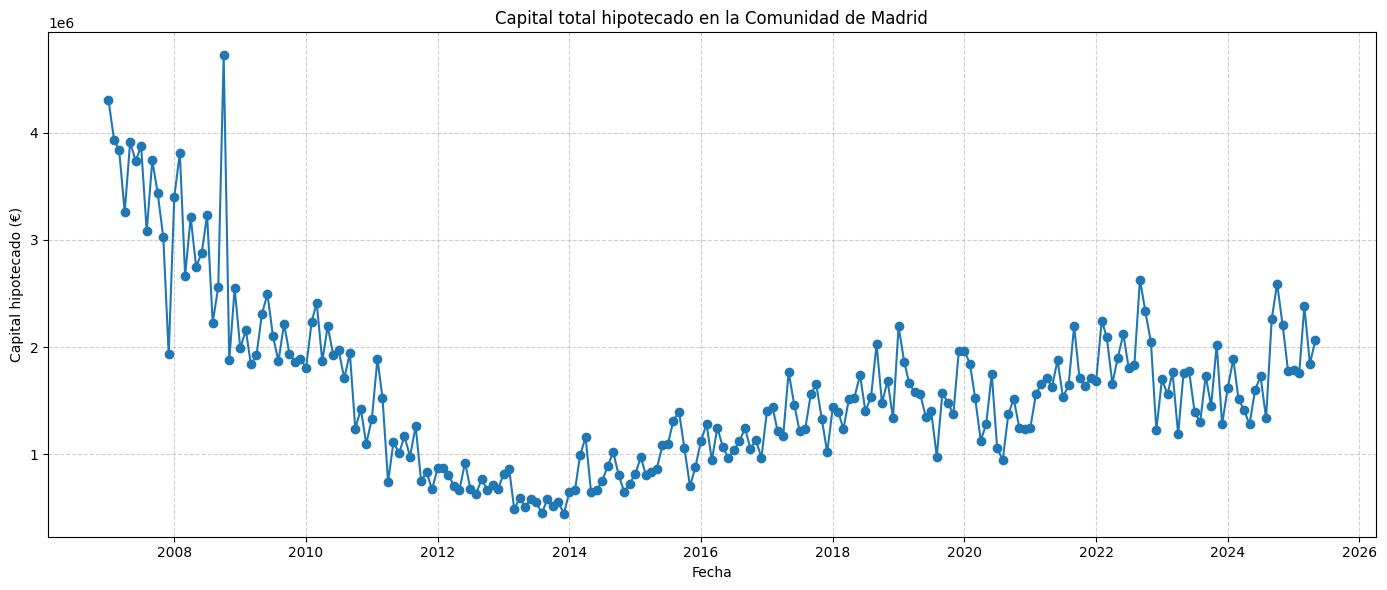

In [33]:
ch = capital_hipotecado.copy()

# Diccionario meses en español → número
meses = {
    "enero": 1, "febrero": 2, "marzo": 3, "abril": 4,
    "mayo": 5, "junio": 6, "julio": 7, "agosto": 8,
    "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12
}

# Extraer año como entero
ch["AÑO"] = pd.to_datetime(ch["AÑO"], errors="coerce").dt.year

# Crear columna de fecha
ch["Mes_num"] = ch["MES"].map(meses)
ch["Fecha"] = pd.to_datetime(dict(year=ch["AÑO"], month=ch["Mes_num"], day=1))

# Ordenar por fecha
ch = ch.sort_values("Fecha")

# Gráfico de líneas
plt.figure(figsize=(14,6))
plt.plot(ch["Fecha"], ch["DATO"], marker="o", linewidth=1.5)

plt.title("Capital total hipotecado en la Comunidad de Madrid")
plt.xlabel("Fecha")
plt.ylabel("Capital hipotecado (€)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## 10. Total hipotecas constituidas en Madrid mensualmente

In [34]:
total_hipotecas = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Total hipotecas constituidas en Madrid mensualmente.xlsx")

total_hipotecas.head(10)

FECHA         MES     DATO  T1_1  T1_12
0 2007-01-01       enero  18622.0   NaN    NaN
1 2007-01-02     febrero  16065.0 -13.7    NaN
2 2007-01-03       marzo  19344.0  20.4    NaN
3 2007-01-04       abril  15919.0 -17.7    NaN
4 2007-01-05        mayo  17050.0   7.1    NaN
5 2007-01-06       junio  16133.0  -5.4    NaN
6 2007-01-07       julio  16479.0   2.1    NaN
7 2007-01-08      agosto  13744.0 -16.6    NaN
8 2007-01-09  septiembre  17779.0  29.4    NaN
9 2007-01-10     octubre  13448.0 -24.4    NaN

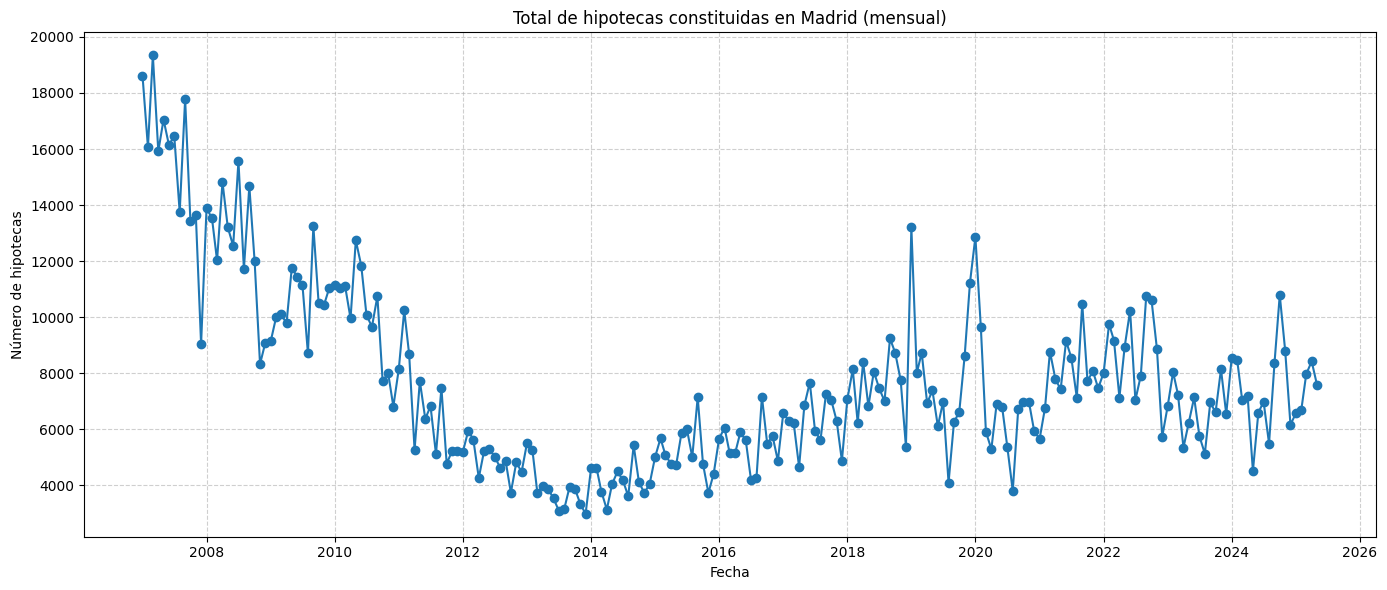

In [37]:
th = total_hipotecas.copy()

# 1) Año correcto a partir de la columna Fecha original
th["AÑO"] = pd.to_datetime(th["FECHA"], errors="coerce").dt.year

# 2) Mapear nombre de mes → número de mes
meses = {
    "enero": 1, "febrero": 2, "marzo": 3, "abril": 4,
    "mayo": 5, "junio": 6, "julio": 7, "agosto": 8,
    "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12
}
th["Mes_num"] = th["MES"].str.lower().map(meses)

# 3) Construir la fecha mensual correcta (primer día del mes)
th["Fecha_ok"] = pd.to_datetime(dict(year=th["AÑO"], month=th["Mes_num"], day=1))

# 4) (Opcional) si hubiera duplicados por mes, agrupa (media)
th = th.groupby("Fecha_ok", as_index=False)["DATO"].mean()

# 5) Ordenar y graficar
th = th.sort_values("Fecha_ok")

plt.figure(figsize=(14,6))
plt.plot(th["Fecha_ok"], th["DATO"], marker="o", linewidth=1.5)
plt.title("Total de hipotecas constituidas en Madrid (mensual)")
plt.xlabel("Fecha")
plt.ylabel("Número de hipotecas")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## 11. Población activa

In [38]:
poblacion_activa = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Población activa.xlsx")

poblacion_activa.head(10)

AÑO     TRIMESTRE    DATO  T1_1  T1_4
0 2007-01-01  1º trimestre  3307.9   NaN   NaN
1 2007-01-02  2º trimestre  3314.8  0.21   NaN
2 2007-01-03  3º trimestre  3351.9  1.12   NaN
3 2007-01-04  4º trimestre  3365.3  0.40   NaN
4 2008-01-01  1º trimestre  3375.6  0.31  2.05
5 2008-01-02  2º trimestre  3425.8  1.49  3.35
6 2008-01-03  3º trimestre  3436.6  0.32  2.53
7 2008-01-04  4º trimestre  3468.9  0.94  3.08
8 2009-01-01  1º trimestre  3481.8  0.37  3.15
9 2009-01-02  2º trimestre  3481.4 -0.01  1.62

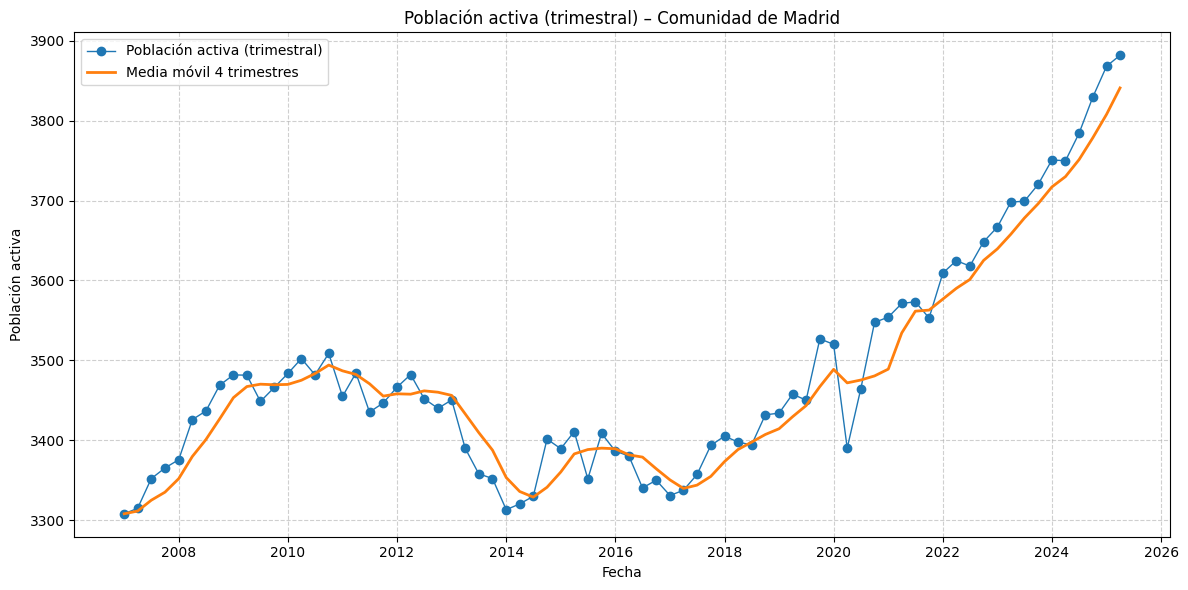

In [40]:
pa = poblacion_activa.copy()

# Mapear trimestre → mes representativo (inicio de trimestre)
trimestres = {
    "1º trimestre": 1,
    "2º trimestre": 4,
    "3º trimestre": 7,
    "4º trimestre": 10,
}

# Año como entero y fecha trimestral correcta
pa["AÑO"] = pd.to_datetime(pa["AÑO"], errors="coerce").dt.year
pa["Mes_num"] = pa["TRIMESTRE"].str.lower().map(trimestres)
pa["Fecha"]   = pd.to_datetime(dict(year=pa["AÑO"], month=pa["Mes_num"], day=1))

# Asegurar numérico y ordenar
pa["DATO"] = pd.to_numeric(pa["DATO"], errors="coerce")
pa = pa.dropna(subset=["Fecha", "DATO"]).sort_values("Fecha")

# Media móvil 4 trimestres (tendencia)
pa["MM4"] = pa["DATO"].rolling(window=4, min_periods=1).mean()

# --- Gráfico ---
plt.figure(figsize=(12,6))
plt.plot(pa["Fecha"], pa["DATO"], marker="o", linewidth=1, label="Población activa (trimestral)")
plt.plot(pa["Fecha"], pa["MM4"], linewidth=2, label="Media móvil 4 trimestres")

plt.title("Población activa (trimestral) – Comunidad de Madrid")
plt.xlabel("Fecha")
plt.ylabel("Población activa")  
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


## 12. Renta disponible

In [41]:
renta = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Renta disponible.xlsx")

renta.head(10)

Dato   Año  Ciudad de Madrid  Centro  Arganzuela  \
0  Renta neta media por persona  2015            15.257  15.512      16.855   
1  Renta neta media por persona  2016            15.717  16.147      17.306   
2  Renta neta media por persona  2017            15.930  16.711      17.738   
3  Renta neta media por persona  2018            16.700  17.932      18.473   
4  Renta neta media por persona  2019            17.030  18.789      19.088   
5  Renta neta media por persona  2020            17.059  18.314      19.284   
6  Renta neta media por persona  2021            17.586  19.199      20.103   
7  Renta neta media por persona  2022            18.632  20.587      21.383   
8    Renta neta media por hogar  2015            38.539  31.392      40.203   
9    Renta neta media por hogar  2016            39.613  32.458      41.122   

   Retiro  Salamanca  Chamartín  Tetuán  Chamberí  ...   Usera  \
0  20.900     23.009     24.155  14.563    21.558  ...   9.276   
1  21.504     24.433     25.969  14.970    22.499  ...   9.395   
2  21.598     24.683     26.267  15.180    22.897  ...   9.552   
3  22.706     26.255     28.190  15.742    24.112  ...   9.860   
4  23.262     25.770     27.634  16.354    24.881  ...  10.211   
5  23.227     25.932     27.719  16.336    24.913  ...  10.239   
6  23.925     25.956     28.233  17.026    25.275  ...  10.797   
7  25.407     28.140     30.506  18.062    27.076  ...  11.430   
8  51.795     53.978     60.962  34.702    48.997  ...  25.573   
9  52.963     57.147     65.260  35.609    50.882  ...  25.954   

   Puente de Vallecas  Moratalaz  Ciudad Lineal  Hortaleza  Villaverde  \
0               9.386     13.714         14.767     17.662       9.642   
1               9.545     13.944         15.048     18.277       9.756   
2               9.706     14.135         15.111     18.620       9.875   
3              10.045     14.637         15.815     19.759      10.164   
4              10.402     15.101         16.349     20.044      10.540   
5              10.445     15.294         16.436     19.890      10.591   
6              10.941     15.667         16.890     20.500      11.059   
7              11.452     16.437         17.808     21.766      11.563   
8              24.690     34.753         36.833     47.113      26.599   
9              25.029     35.059         37.421     48.688      26.915   

   Villa de Vallecas  Vicálvaro  San Blas-Canillejas  Barajas  
0             11.688     11.375               13.171   17.257  
1             11.925     11.695               13.404   17.641  
2             12.114     11.941               13.559   17.807  
3             12.545     12.353               14.100   18.514  
4             12.976     12.916               14.545   19.026  
5             13.099     13.123               14.537   19.138  
6             13.605     13.849               15.115   19.482  
7             14.274     14.832               15.902   20.788  
8             30.175     31.466               34.498   46.347  
9             30.861     32.152               35.077   47.389  

[10 rows x 24 columns]

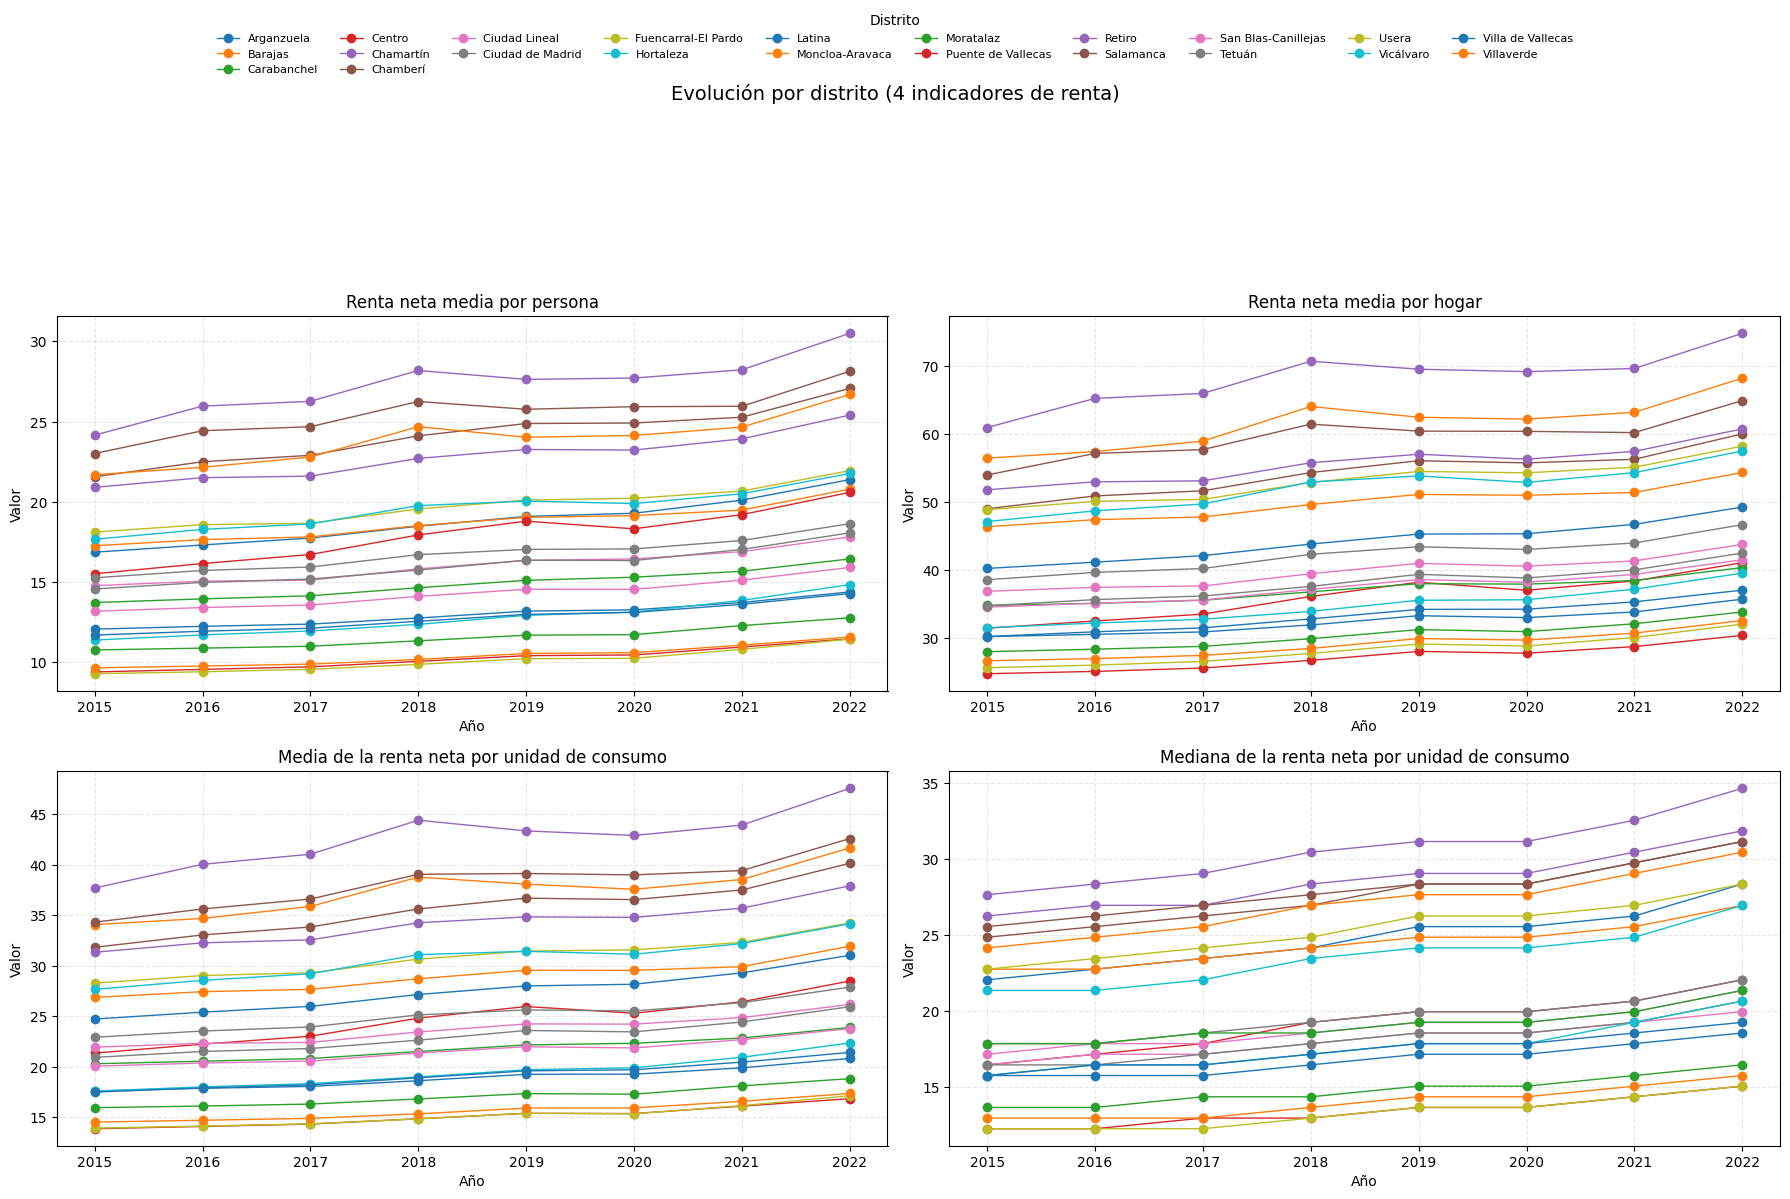

In [42]:
import math
# === 1) Preparación y limpieza ===
r = renta.copy()

# Normaliza el texto de 'Dato'
r["Dato"] = (
    r["Dato"].astype(str)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

# Extrae el AÑO de forma robusta (funciona con 2015, 2015.0, '2015-01-01', etc.)
r["Año"] = r["Año"].astype(str).str.extract(r"(\d{4})")[0]
r["Año"] = pd.to_numeric(r["Año"], errors="coerce")

# === 2) Wide -> Long ===
id_cols = ["Dato", "Año"]
dist_cols = [c for c in r.columns if c not in id_cols]

r_long = r.melt(
    id_vars=id_cols,
    value_vars=dist_cols,
    var_name="Distrito",
    value_name="Valor"
)

r_long["Valor"] = pd.to_numeric(r_long["Valor"], errors="coerce")
r_long = r_long.dropna(subset=["Valor", "Año"]).sort_values(["Dato", "Distrito", "Año"])

# Orden explícito de los 4 indicadores 
orden_datos = [
    "Renta neta media por persona",
    "Renta neta media por hogar",
    "Media de la renta neta por unidad de consumo",
    "Mediana de la renta neta por unidad de consumo",
]
datos = [d for d in orden_datos if d in set(r_long["Dato"])]

# === 3) Figura 2x2: un subplot por 'Dato' ===
rows, cols = 2, 2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 10), sharex=False)
axes = axes.ravel()

for i, dato in enumerate(datos):
    ax = axes[i]
    g = r_long[r_long["Dato"] == dato]

    # Una línea por distrito
    for dist, gd in g.groupby("Distrito"):
        ax.plot(gd["Año"].astype(int), gd["Valor"], marker="o", linewidth=1, label=dist)

    ax.set_title(dato)
    ax.set_xlabel("Año")
    ax.set_ylabel("Valor")
    ax.set_xticks(sorted(g["Año"].dropna().unique().astype(int)))
    ax.grid(True, linestyle="--", alpha=0.3)

# Oculta ejes sobrantes si hubiera menos de 4 'Dato'
for j in range(len(datos), len(axes)):
    axes[j].axis("off")

# === 4) Leyenda global arriba (que no tape) + títulos/márgenes ===
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels, title="Distrito",
    loc="upper center", bbox_to_anchor=(0.5, 1.20),
    ncol=min(len(labels), 10), fontsize=8, frameon=False
)

fig.suptitle("Evolución por distrito (4 indicadores de renta)", y=1.12, fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.96])  # deja margen superior para la leyenda
plt.show()


## 13. Población por distritos y barrios

In [43]:
poblacion_distritos = pd.read_csv(
    r"C:\Users\evahr\Downloads\TFM-idealista\Población_distrito_barrio.csv",
    sep=";",
    encoding="utf-8"
)

print(poblacion_distritos.head(10))

                fecha  cod_municipio municipio cod_distrito  \
0  1 de enero de 2024          28079    Madrid            1   
1  1 de enero de 2024          28079    Madrid            2   
2  1 de enero de 2024          28079    Madrid            3   
3  1 de enero de 2024          28079    Madrid            4   
4  1 de enero de 2024          28079    Madrid            5   
5  1 de enero de 2024          28079    Madrid            6   
6  1 de enero de 2024          28079    Madrid            7   
7  1 de enero de 2024          28079    Madrid            8   
8  1 de enero de 2024          28079    Madrid            9   
9  1 de enero de 2024          28079    Madrid           10   

               distrito cod_barrio                barrio  num_personas  \
0                Centro          1                Centro        145411   
1            Arganzuela          2            Arganzuela        156559   
2                Retiro          3                Retiro        119757   
3         

C:\Users\evahr\AppData\Local\Temp\ipykernel_23052\721619183.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd_df["Fecha"] = pd.to_datetime(pd_df["fecha"], errors="coerce", dayfirst=True)


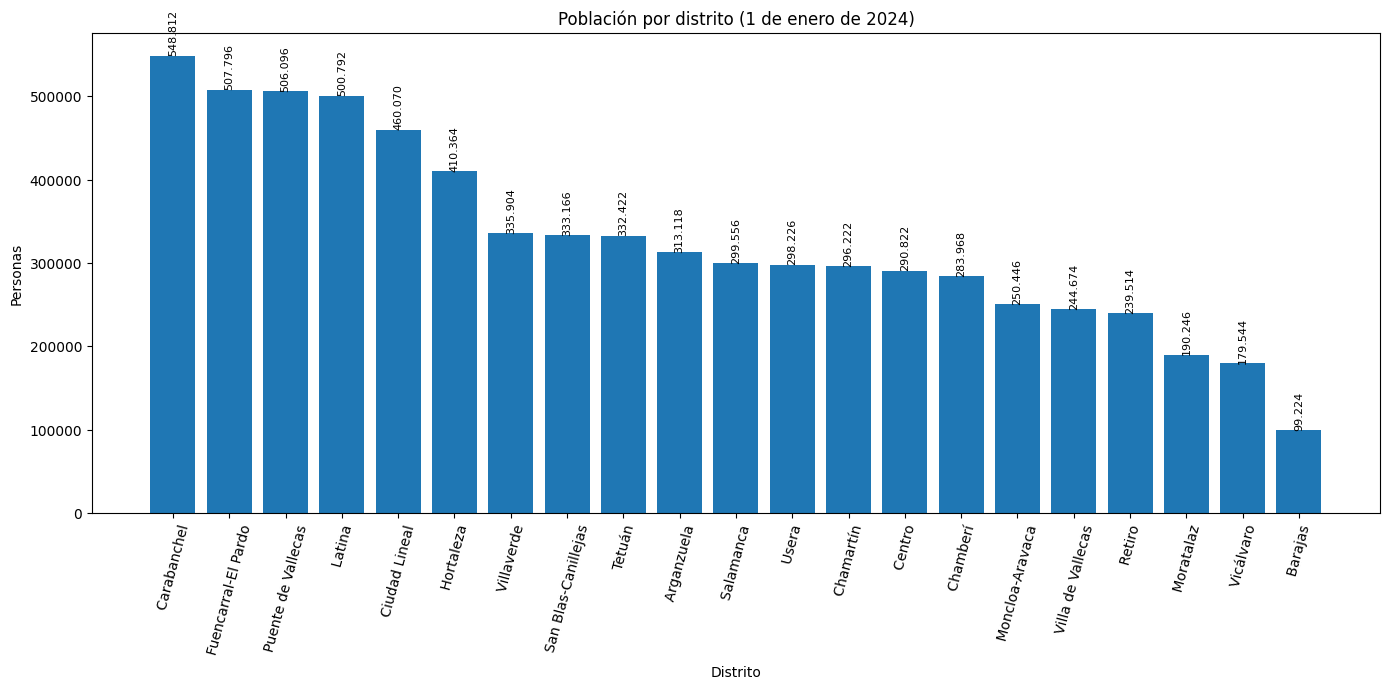

In [45]:
import re

pd_df = poblacion_distritos.copy()

# 1) Detectar la columna de personas 
val_col = next(c for c in pd_df.columns if re.search(r'num[\s_]*person', c.lower()))

# 2) Parsear la fecha (soporta "1 de enero de 2024")
pd_df["Fecha"] = pd.to_datetime(pd_df["fecha"], errors="coerce", dayfirst=True)
mask = pd_df["Fecha"].isna()
if mask.any():
    meses = {
        "enero":1,"febrero":2,"marzo":3,"abril":4,"mayo":5,"junio":6,
        "julio":7,"agosto":8,"septiembre":9,"octubre":10,"noviembre":11,"diciembre":12
    }
    s = pd_df.loc[mask, "fecha"].astype(str).str.lower()
    m = s.str.extract(r'(?P<dia>\d{1,2})\s+de\s+(?P<mes>[a-záéíóúüñ]+)\s+de\s+(?P<ano>\d{4})')
    pd_df.loc[mask, "Fecha"] = pd.to_datetime(
        dict(
            year=pd.to_numeric(m["ano"], errors="coerce"),
            month=m["mes"].map(meses),
            day=pd.to_numeric(m["dia"], errors="coerce"),
        ),
        errors="coerce"
    )

# 3) Limpiar filas "Todos" y asegurar numérico
for col in ("distrito", "barrio", "cod_barrio"):
    if col in pd_df.columns:
        pd_df = pd_df[~pd_df[col].astype(str).str.lower().eq("todos")]

pd_df[val_col] = pd.to_numeric(pd_df[val_col], errors="coerce")

# 4) Filtrar a 01/01/2024 y agregar por distrito
target = pd.Timestamp(2024, 1, 1)
f = pd_df[pd_df["Fecha"] == target]
bars = (f.groupby("distrito", as_index=False)[val_col]
          .sum()
          .sort_values(val_col, ascending=False))

# 5) Gráfico de barras
plt.figure(figsize=(14, 7))
plt.bar(bars["distrito"], bars[val_col])
plt.title("Población por distrito (1 de enero de 2024)")
plt.xlabel("Distrito")
plt.ylabel("Personas")
plt.xticks(rotation=75)

# Etiquetas encima de cada barra (formato miles con punto)
for i, v in enumerate(bars[val_col].values):
    plt.text(i, v, f"{int(round(v)):,}".replace(",", "."), ha="center", va="bottom", fontsize=8, rotation=90)

plt.tight_layout()
plt.show()


## 14. Esperanza de vida

In [46]:
esperanza_vida = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Esperanza de vida.xlsx")

esperanza_vida.head(10)

AÑO Ciudad de Madrid Centro Arganzuela Retiro Salamanca Chamartín Tetuan  \
0  2004               82   81,5       82,6     83        83      82,7     81   
1  2005               82   80,5       82,1   83,4      83,2      83,1   81,9   
2  2006             82,7   81,1       83,1   83,7        83      83,4   83,1   
3  2007             82,4   81,4       83,4   84,1        83      83,8   82,9   
4  2008             82,8   81,8       83,3   83,3      83,7      84,5   82,9   
5  2009             83,5   82,1       83,6     84      84,1      84,7   83,5   
6  2010             83,8     83       84,4   84,8      84,4      84,2   83,5   
7  2011             83,9   83,2       84,6   85,2      84,8      84,9     84   
8  2012             83,9   83,1       84,6   84,9      85,2      84,3   83,6   
9  2013             84,5   83,4       85,8   85,2      85,1        85   84,4   

  Chamberi Fuencarral-El Pardo  ... Usera Puente De Vallecas Moratalaz  \
0     82,6                81,9  ...  81,4               80,2      82,6   
1     82,6                81,8  ...    81               80,5      82,3   
2     83,4                82,9  ...  81,3               81,3        83   
3     82,1                82,9  ...  81,3               80,7      82,6   
4     82,9                82,9  ...  81,2               81,3      82,8   
5     84,2                83,9  ...    82               82,6      84,1   
6       84                83,9  ...  83,1               82,3      83,7   
7     84,3                84,1  ...  82,2               82,8        84   
8     84,4                  84  ...  82,9                 83      83,9   
9     84,5                84,4  ...  83,5               83,5      84,5   

  Ciudad Lineal Hortaleza Villaverde Villa de Vallecas Vicalvaro  \
0          82,4      82,5       81,3              79,6      80,4   
1          82,5      81,7       81,4                81      80,8   
2          82,9      82,9       82,1              82,7      83,4   
3          82,6      82,8       81,5              81,7      81,4   
4          83,7      83,1       81,7              81,9      82,6   
5          83,8      83,4       82,8              82,6      83,1   
6          84,2      84,2       83,3              83,7      83,3   
7          83,8      83,9       83,6              83,5      84,4   
8          84,6      84,1       83,3              83,2      84,4   
9            85      85,1       83,6              83,5      84,2   

  San Blas-Canillejas Barajas  
0                81,4    82,3  
1                80,6    82,8  
2                82,1    83,7  
3                81,2    82,3  
4                82,1    83,5  
5                83,2    83,3  
6                82,8    83,3  
7                83,6    83,8  
8                83,2    84,2  
9                83,7    84,5  

[10 rows x 23 columns]

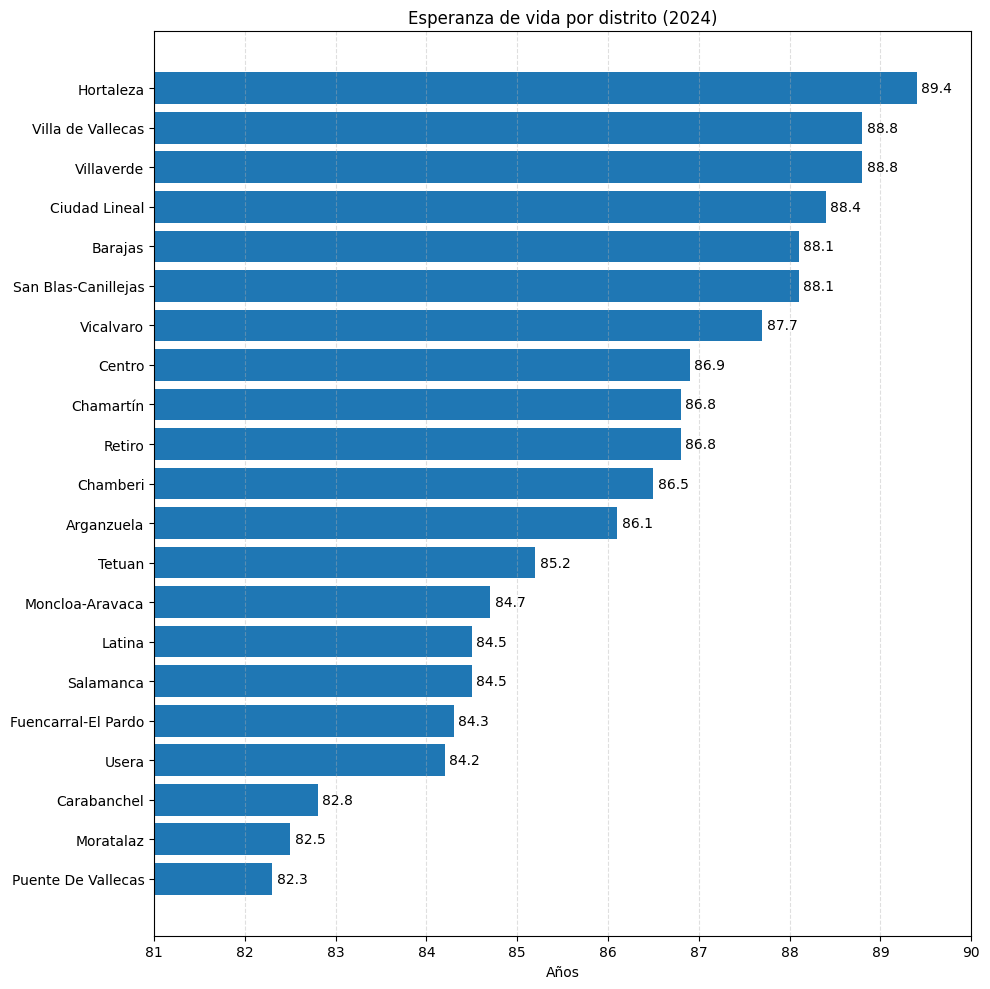

In [52]:
# === 1) Preparación ===
ev = esperanza_vida.copy()

# Extrae el año (robusto a 2015, 2015.0, '2015-01-01', etc.)
ev["AÑO"] = ev["AÑO"].astype(str).str.extract(r"(\d{4})")[0].astype("Int64")

year = 2024
fila = ev.loc[ev["AÑO"] == year]
if fila.empty:
    raise ValueError(f"No hay datos para el año {year} en 'esperanza_vida'.")

# Columnas de distritos (excluye 'Año' y 'Ciudad de Madrid')
cols_distritos = [c for c in ev.columns if c not in ["AÑO", "Ciudad de Madrid"]]

# Serie distrito → valor (convierte coma decimal a punto)
s = fila[cols_distritos].iloc[0].astype(str).str.replace(",", ".", regex=False)
s = pd.to_numeric(s, errors="coerce").dropna()

# Ordena (para barras horizontales queda mejor ascendente)
s = s.sort_values()

# === 2) ELIGE ORIENTACIÓN ===
modo = "horizontal"   

if modo == "vertical":
    # ---- Barras verticales con zoom y etiquetas ----
    vals, labels = s.values, s.index
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.bar(labels, vals, width=0.6)

    ymin = max(75, np.floor(s.min() - 1))    
    ymax = np.ceil(s.max() + 0.5)
    ax.set_ylim(ymin, ymax)

    ax.set_title(f"Esperanza de vida por distrito ({year})")
    ax.set_xlabel("Distrito")
    ax.set_ylabel("Años")
    ax.set_xticklabels(labels, rotation=60, ha="right")
    ax.grid(axis="y", linestyle="--", alpha=0.4)

    # Etiquetas encima de cada barrita
    for i, v in enumerate(vals):
        ax.text(i, v + 0.05, f"{v:.1f}", ha="center", va="bottom", fontsize=10)

    plt.tight_layout()
    plt.show()

else:
    # ---- Barras horizontales  ----
    vals, labels = s.values[::-1], s.index[::-1]  
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.barh(labels, vals)

    xmin = max(75, np.floor(s.min() - 1))
    xmax = np.ceil(s.max() + 0.5)
    ax.set_xlim(xmin, xmax)
    ax.invert_yaxis()

    ax.set_title(f"Esperanza de vida por distrito ({year})")
    ax.set_xlabel("Años")
    ax.grid(axis="x", linestyle="--", alpha=0.4)

    # Etiquetas al final de cada barra
    for i, v in enumerate(vals):
        ax.text(v + 0.05, i, f"{v:.1f}", va="center", ha="left", fontsize=10)

    plt.tight_layout()
    plt.show()


## 15. Paro registrado por distritos

In [53]:
paro = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Paro registrado por distritos.xlsx")

paro.head(10)

Año         Mes Ciudad de Madrid 01. Centro 01. Centro.1 01. Centro.2  \
0  2017       Enero               ..         ..           ..           ..   
1  2017     Febrero               ..         ..           ..           ..   
2  2017       Marzo               ..         ..           ..           ..   
3  2017       Abril               ..         ..           ..           ..   
4  2017        Mayo               ..         ..           ..           ..   
5  2017       Junio               ..         ..           ..           ..   
6  2017       Julio               ..         ..           ..           ..   
7  2017      Agosto               ..         ..           ..           ..   
8  2017  Septiembre               ..         ..           ..           ..   
9  2017     Octubre               ..         ..           ..           ..   

  01. Centro.3 01. Centro.4 01. Centro.5 01. Centro.6  ...  \
0           ..           ..           ..           ..  ...   
1           ..           ..           ..           ..  ...   
2           ..           ..           ..           ..  ...   
3           ..           ..           ..           ..  ...   
4           ..           ..           ..           ..  ...   
5           ..           ..           ..           ..  ...   
6           ..           ..           ..           ..  ...   
7           ..           ..           ..           ..  ...   
8           ..           ..           ..           ..  ...   
9           ..           ..           ..           ..  ...   

  20. San Blas-Canillejas.7 20. San Blas-Canillejas.8  \
0                        ..                        ..   
1                        ..                        ..   
2                        ..                        ..   
3                        ..                        ..   
4                        ..                        ..   
5                        ..                        ..   
6                        ..                        ..   
7                        ..                        ..   
8                        ..                        ..   
9                        ..                        ..   

  20. San Blas-Canillejas.9 21. Barajas 21. Barajas.1 21. Barajas.2  \
0                        ..          ..            ..            ..   
1                        ..          ..            ..            ..   
2                        ..          ..            ..            ..   
3                        ..          ..            ..            ..   
4                        ..          ..            ..            ..   
5                        ..          ..            ..            ..   
6                        ..          ..            ..            ..   
7                        ..          ..            ..            ..   
8                        ..          ..            ..            ..   
9                        ..          ..            ..            ..   

  21. Barajas.3 21. Barajas.4 21. Barajas.5 21. Barajas.6  
0            ..            ..            ..            ..  
1            ..            ..            ..            ..  
2            ..            ..            ..            ..  
3            ..            ..            ..            ..  
4            ..            ..            ..            ..  
5            ..            ..            ..            ..  
6            ..            ..            ..            ..  
7            ..            ..            ..            ..  
8            ..            ..            ..            ..  
9            ..            ..            ..            ..  

[10 rows x 176 columns]

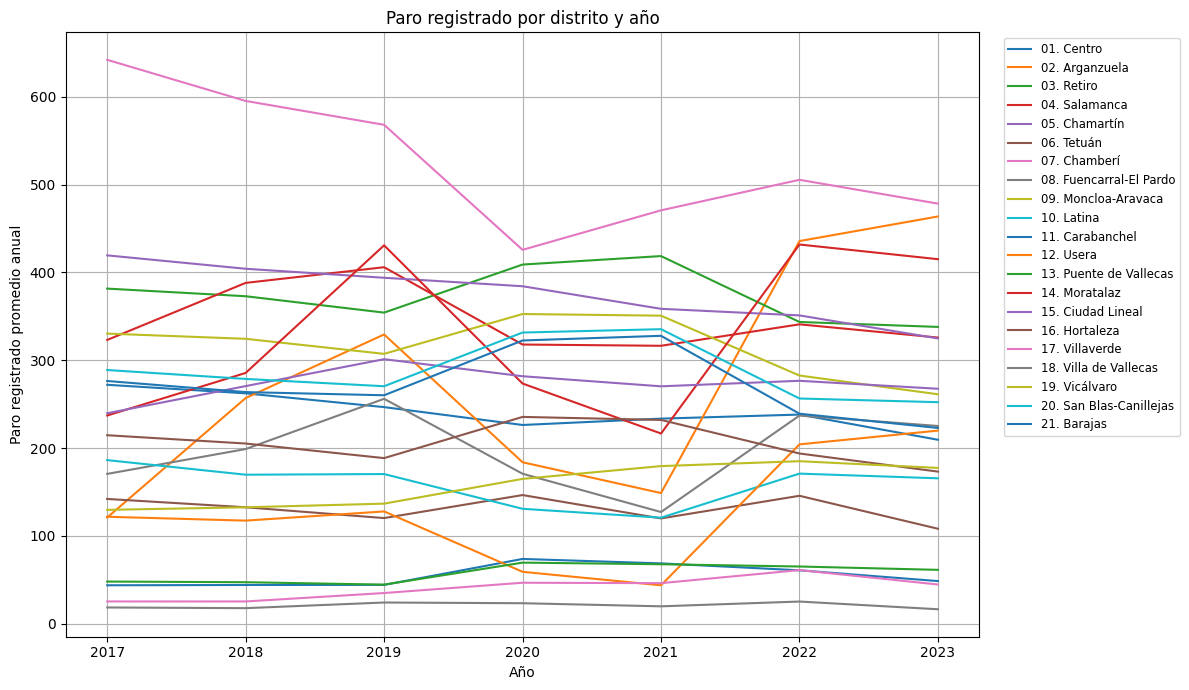

In [54]:
# Eliminar espacios y columnas innecesarias
paro.columns = paro.columns.str.strip()
paro = paro.drop(columns=[col for col in paro.columns if col.lower() in ['mes', 'ciudad de madrid']])

# Seleccionar columnas que contienen código de distrito 
columnas_distrito = [col for col in paro.columns if '.' in col]

# Convertir a numérico
paro[columnas_distrito] = paro[columnas_distrito].apply(pd.to_numeric, errors='coerce')

# Agrupar columnas por nombre base (sin sufijos .1, .2, etc.)
# Creamos un diccionario donde cada clave es el nombre base, y el valor, sus columnas
from collections import defaultdict

agrupaciones = defaultdict(list)
for col in columnas_distrito:
    base = col.split('.')[0].strip() + '. ' + col.split('.')[1].split('.')[0].strip()  
    agrupaciones[base].append(col)

# Crear nuevo DataFrame con una columna por distrito
df_distritos = pd.DataFrame()
df_distritos["Año"] = paro["Año"]

for distrito, cols in agrupaciones.items():
    df_distritos[distrito] = paro[cols].mean(axis=1)

# Agrupar por año para tener promedio anual
paro_anual = df_distritos.groupby("Año").mean()

# Graficar
plt.figure(figsize=(12, 7))
for distrito in paro_anual.columns:
    plt.plot(paro_anual.index, paro_anual[distrito], label=distrito)

plt.title("Paro registrado por distrito y año")
plt.xlabel("Año")
plt.ylabel("Paro registrado promedio anual")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

## 16. Evolución precio alquiler de la vivienda

In [55]:
evolucion_precio_alquiler = pd.read_csv(
    r"C:\Users\evahr\Downloads\TFM-idealista\Evolución del precio de alquiler de la vivienda (€m2) por Distrito (Período 2006-2024).csv",
    sep=";", 
    encoding="utf-8"
)

print(evolucion_precio_alquiler.head(10))



    Año                 Distrito Enero Febrero Marzo Abril Mayo Junio Julio  \
0  2006         Ciudad de Madrid    ..      ..    ..    ..   ..    ..    ..   
1  2006               01. Centro    ..      ..    ..    ..   ..    ..    ..   
2  2006           02. Arganzuela    ..      ..    ..    ..   ..    ..    ..   
3  2006               03. Retiro    ..      ..    ..    ..   ..    ..    ..   
4  2006            04. Salamanca    ..      ..    ..    ..   ..    ..    ..   
5  2006            05. Chamartín    ..      ..    ..    ..   ..    ..    ..   
6  2006               06. Tetuán    ..      ..    ..    ..   ..    ..    ..   
7  2006             07. Chamberí    ..      ..    ..    ..   ..    ..    ..   
8  2006  08. Fuencarral-El Pardo    ..      ..    ..    ..   ..    ..    ..   
9  2006      09. Moncloa-Aravaca    ..      ..    ..    ..   ..    ..    ..   

  Agosto Septiembre Octubre Noviembre Diciembre  
0     ..         ..      ..        ..        ..  
1     ..         ..      ..   

## 16. Evolución precio venta de la vivienda

In [60]:
evolucion_precio_venta = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Evolución precio venta vivienda.xlsx")

evolucion_precio_venta.head(10)

Año                 Distrito Enero Febrero  Marzo  Abril   Mayo  Junio  \
0  2006         Ciudad de Madrid     -       -  3.586  3.431  3.550  3.473   
1  2006               01. Centro     -       -      -      -      -      -   
2  2006           02. Arganzuela     -       -      -      -      -      -   
3  2006               03. Retiro     -       -      -      -      -      -   
4  2006            04. Salamanca     -       -      -      -      -      -   
5  2006            05. Chamartín     -       -      -      -      -      -   
6  2006               06. Tetuán     -       -      -      -      -      -   
7  2006             07. Chamberí     -       -      -      -      -      -   
8  2006  08. Fuencarral-El Pardo     -       -      -      -      -      -   
9  2006      09. Moncloa-Aravaca     -       -      -      -      -      -   

   Julio Agosto Septiembre Octubre Noviembre Diciembre  
0  3.488  3.477      3.458   3.359     3.491     3.487  
1      -      -          -       -         -         -  
2      -      -          -       -         -         -  
3      -      -          -       -         -         -  
4      -      -          -       -         -         -  
5      -      -          -       -         -         -  
6      -      -          -       -         -         -  
7      -      -          -       -         -         -  
8      -      -          -       -         -         -  
9      -      -          -       -         -         -

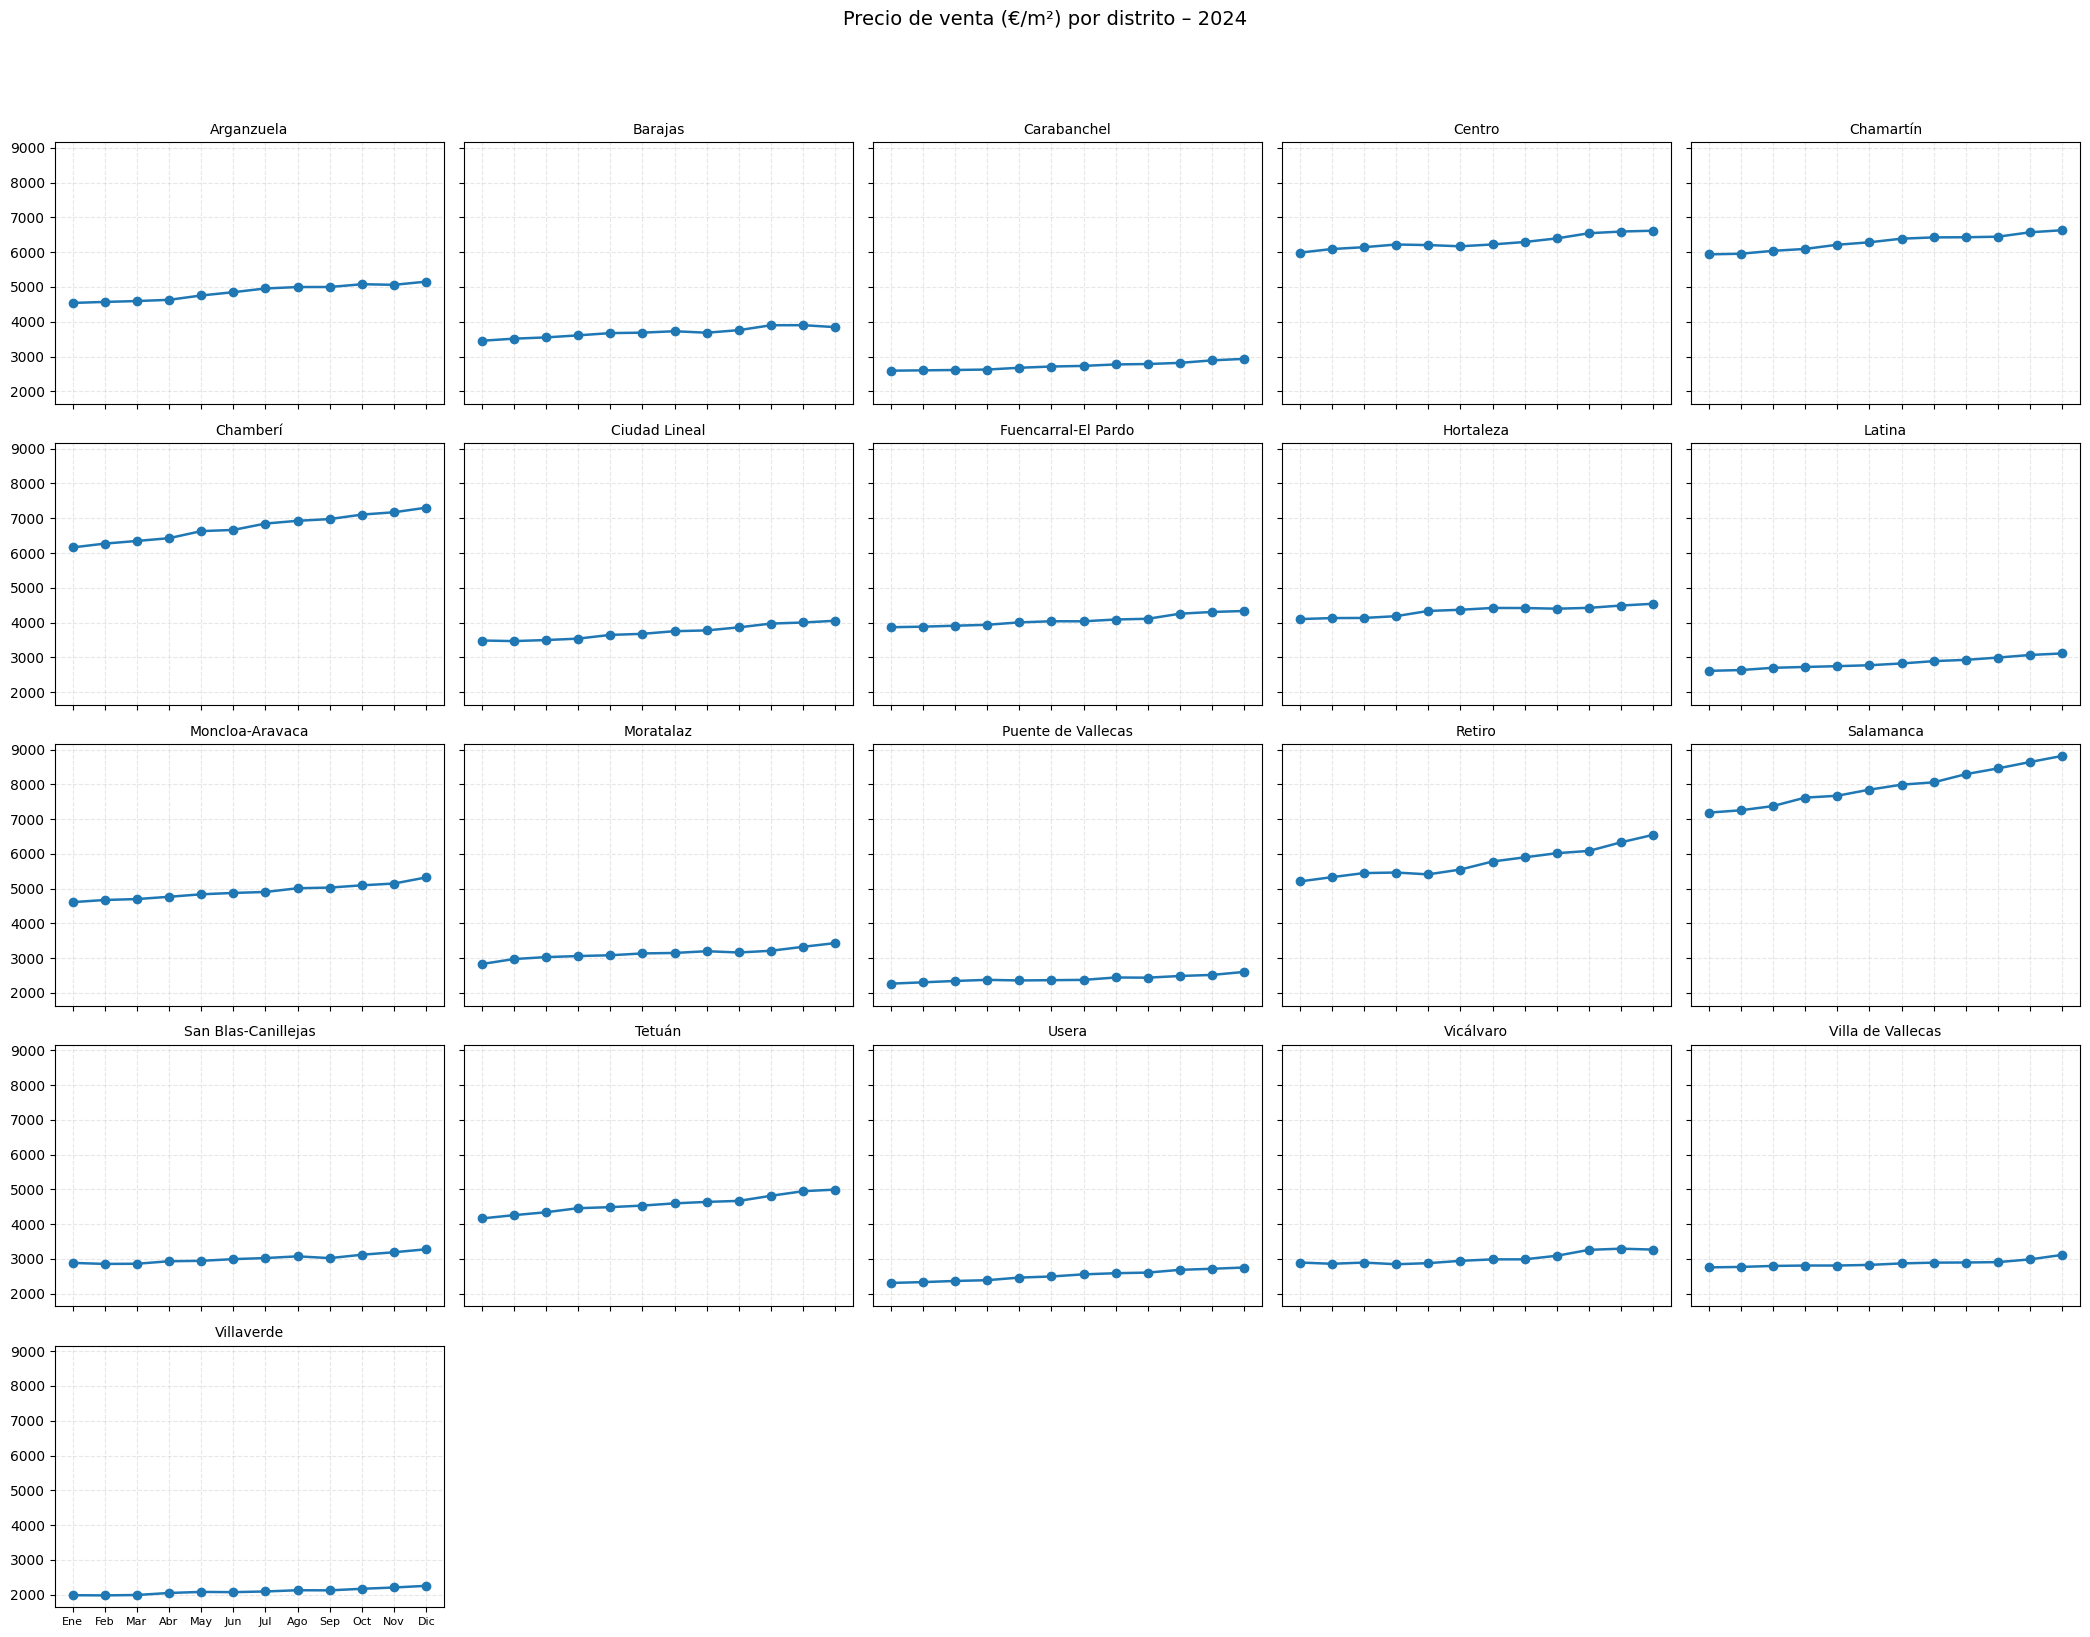

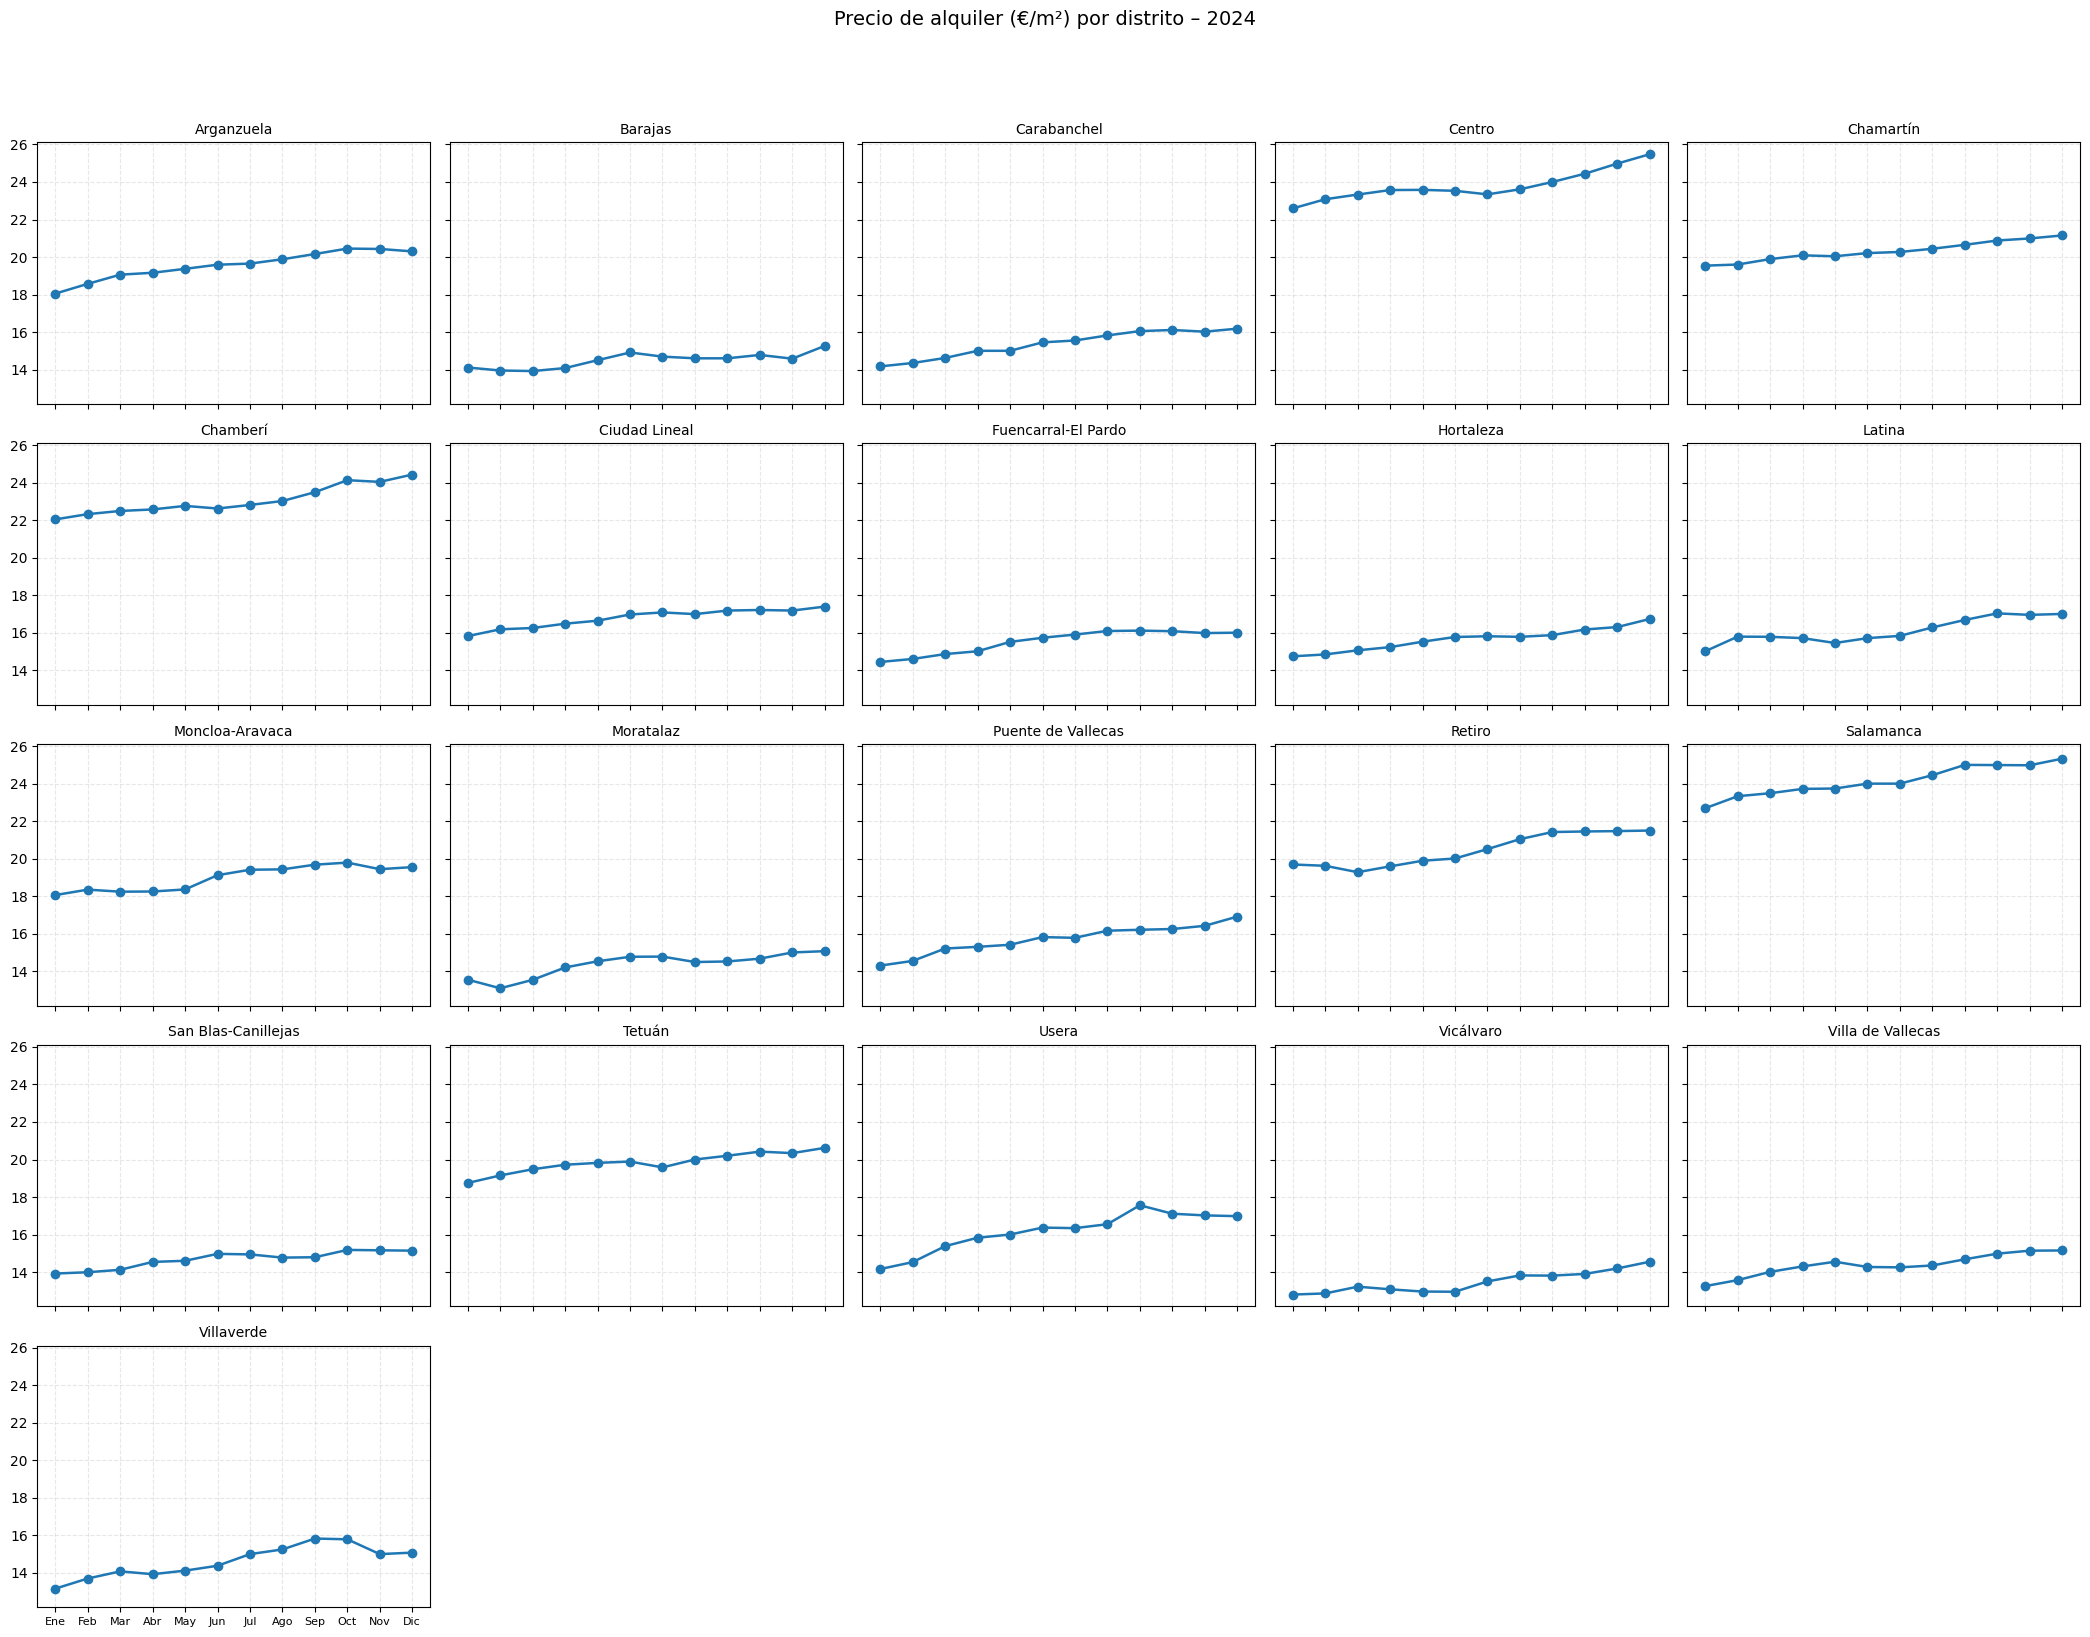

In [61]:
import re, math, numpy as np, pandas as pd
import matplotlib.pyplot as plt

# ================== CONFIG ==================
YEAR = 2024
MESES = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
         "Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
ABBR = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
MES2NUM = {m:i+1 for i,m in enumerate(MESES)}

# ----- Helpers -----
def to_num(x):
    """Convierte textos con miles/decimales ('.' miles, ',' decimal, '-', '..') a float."""
    s = str(x).strip()
    if s in ("", "-", "..", "...", "NaN", "nan", "None"):
        return np.nan
    s = s.replace("\u00A0","").replace(" ","")  
    s = s.replace(".", "")                      
    s = s.replace(",", ".")                     
    try: return float(s)
    except: return np.nan

def clean_distrito(s):
    """Quita prefijos '01. ' etc. y deja el nombre limpio."""
    return re.sub(r"^\s*\d+\.\s*", "", str(s)).strip()

def prep_wide_to_long(df, tipo_label):
    """Pasa de columnas mensuales a long, limpia numéricos y nombres."""
    tmp = df.copy()
    tmp["Año"] = pd.to_numeric(tmp["Año"], errors="coerce")
    tmp["Distrito"] = tmp["Distrito"].apply(clean_distrito)

    # columnas de meses que existan realmente en el df
    month_cols = [c for c in MESES if c in tmp.columns]

    long_ = tmp.melt(
        id_vars=["Año","Distrito"], value_vars=month_cols,
        var_name="Mes", value_name="Precio"
    )
    long_["Precio"] = long_["Precio"].apply(to_num)
    long_["Mes_num"] = long_["Mes"].map(MES2NUM)
    long_["Tipo"] = tipo_label
    return long_

def plot_panel(df_long, titulo):
    """Dibuja panel: un subplot por distrito en el año YEAR."""
    d = (df_long[(df_long["Año"] == YEAR) &
                 (df_long["Distrito"].str.lower() != "ciudad de madrid")]
                 .dropna(subset=["Mes_num"]))

    if d.empty:
        raise ValueError(f"No hay datos para {titulo} en {YEAR} tras la limpieza.")

    distritos = sorted(d["Distrito"].unique())
    n = len(distritos)
    ncols = 5
    nrows = math.ceil(n / ncols)

    # mismos límites Y para todos los subplots 
    y_min = np.nanmin(d["Precio"])
    y_max = np.nanmax(d["Precio"])
    y_pad = (y_max - y_min) * 0.05 if np.isfinite(y_min) and np.isfinite(y_max) else 0
    y_min, y_max = (y_min - y_pad, y_max + y_pad)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=(ncols*4.2, nrows*3.2), sharex=True, sharey=True)
    axes = np.array(axes).ravel()

    for i, dist in enumerate(distritos):
        ax = axes[i]
        serie = d[d["Distrito"] == dist].sort_values("Mes_num")
        ax.plot(serie["Mes_num"], serie["Precio"], marker="o", linewidth=1.8)
        ax.set_title(dist, fontsize=10)
        ax.set_xticks(range(1, 13))
        ax.set_xticklabels(ABBR, fontsize=8)
        ax.grid(True, linestyle="--", alpha=0.3)
        ax.set_ylim(y_min, y_max)

    # Oculta ejes sobrantes
    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    fig.suptitle(f"{titulo} – {YEAR}", y=1.02, fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# ================== VENTA ==================
venta_long = prep_wide_to_long(evolucion_precio_venta, "Venta")
plot_panel(venta_long, "Precio de venta (€/m²) por distrito")

# ================== ALQUILER ==================
alquiler_long = prep_wide_to_long(evolucion_precio_alquiler, "Alquiler")
plot_panel(alquiler_long, "Precio de alquiler (€/m²) por distrito")


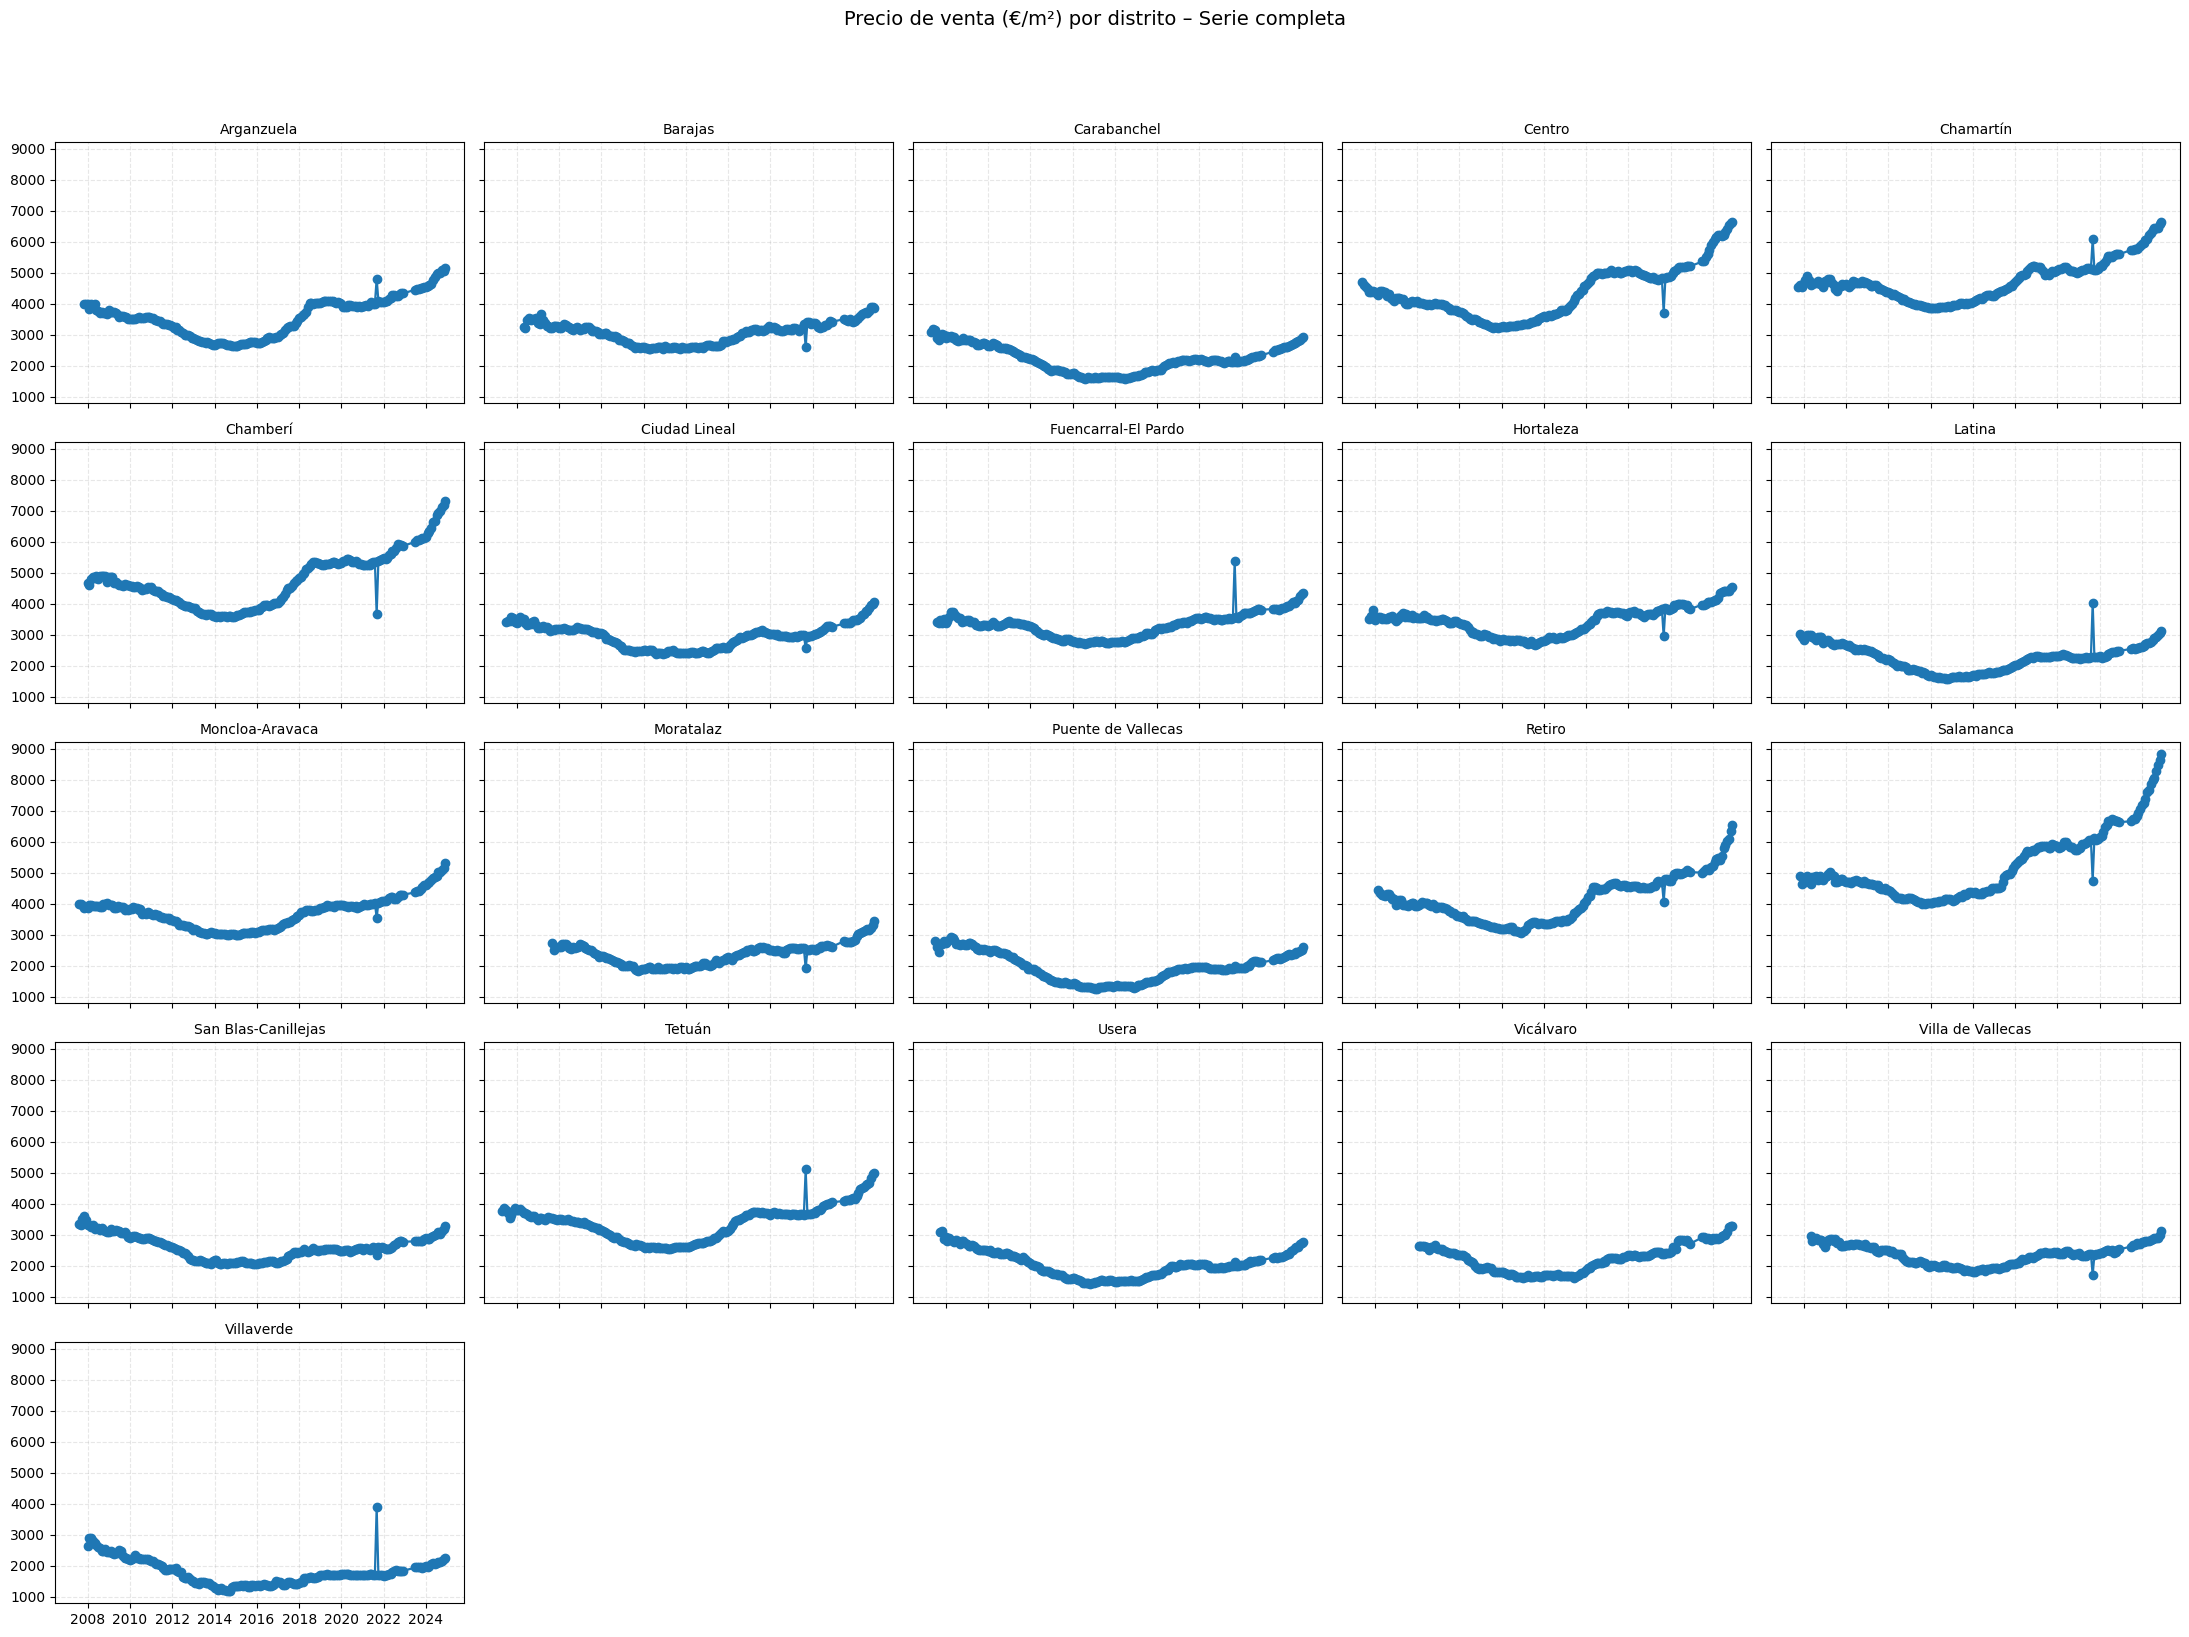

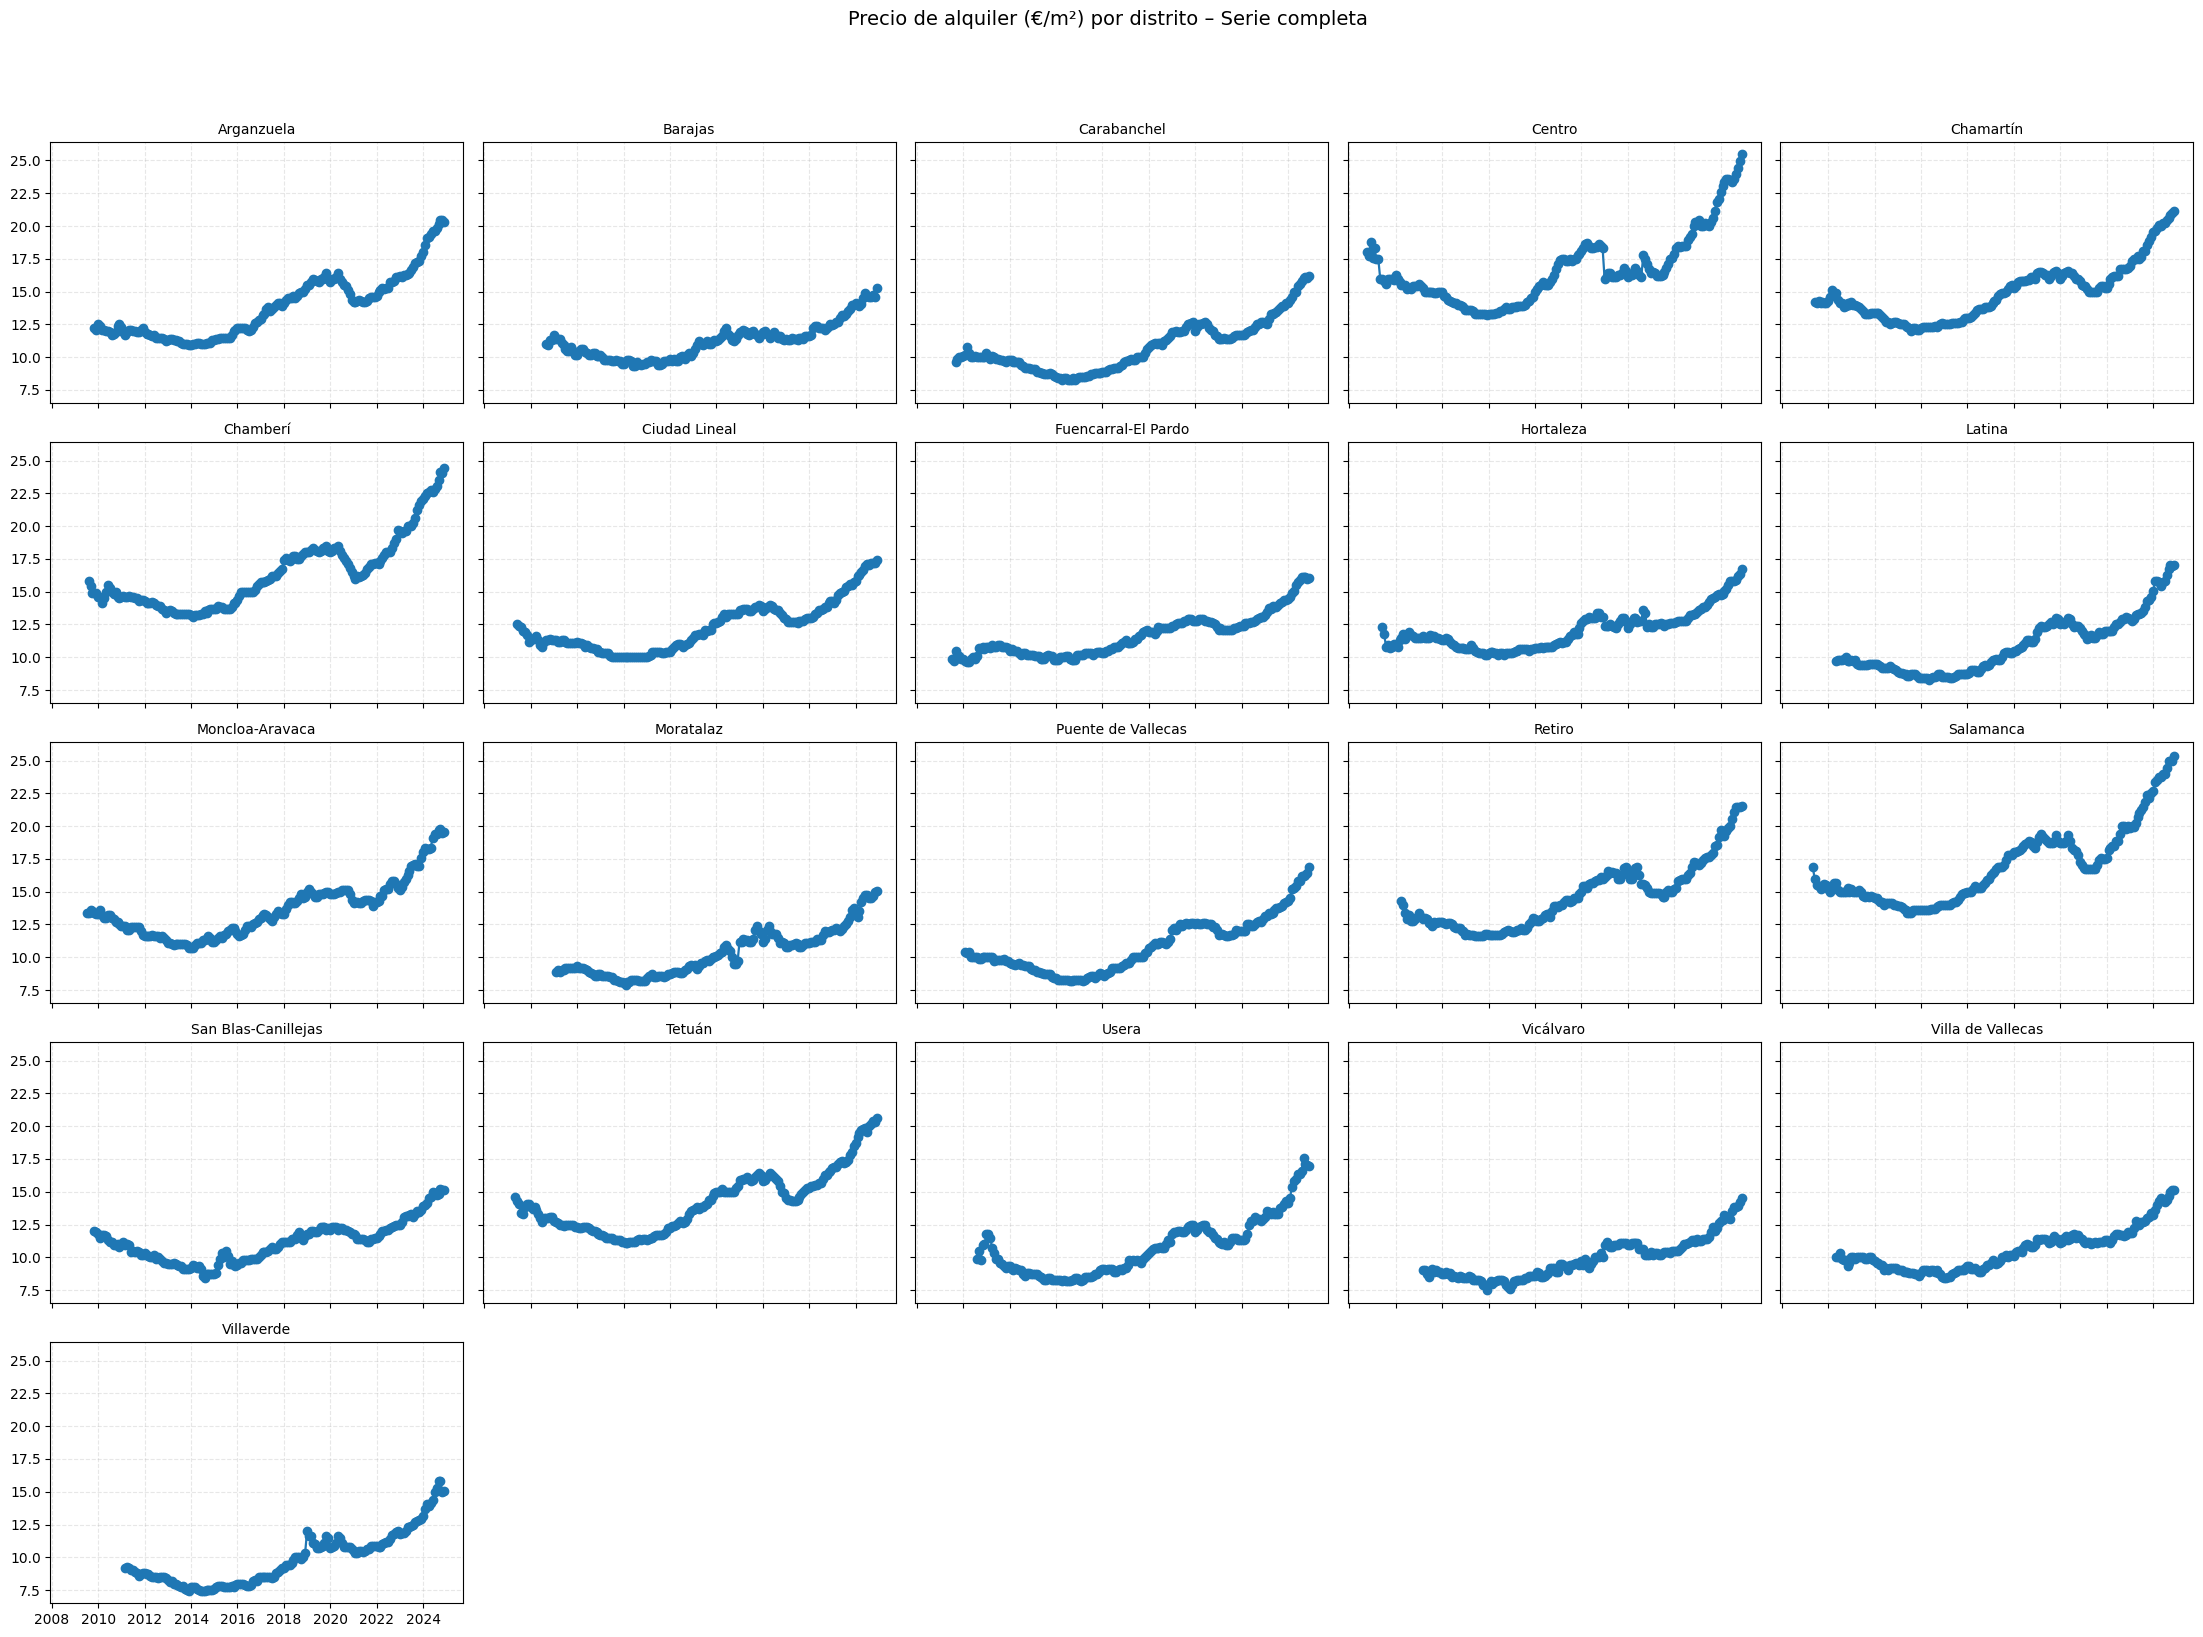

In [62]:
import re, math, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ================== CONFIG ==================
MESES = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
         "Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
MES2NUM = {m: i+1 for i, m in enumerate(MESES)}

# ----- Helpers -----
def to_num(x):
    """Convierte textos con miles/decimales ('.' miles, ',' decimal, '-', '..') a float."""
    s = str(x).strip()
    if s in ("", "-", "..", "...", "NaN", "nan", "None"):
        return np.nan
    s = s.replace("\u00A0", "").replace(" ", "")  
    s = s.replace(".", "")                        
    s = s.replace(",", ".")                       
    try:
        return float(s)
    except Exception:
        return np.nan

def clean_distrito(s):
    """Quita prefijos '01. ' etc. y deja el nombre limpio."""
    return re.sub(r"^\s*\d+\.\s*", "", str(s)).strip()

def prep_wide_to_long(df, tipo_label):
    """Pasa de columnas mensuales a formato largo y limpia numéricos/nombres."""
    tmp = df.copy()
    tmp["Año"] = pd.to_numeric(tmp["Año"], errors="coerce")
    tmp["Distrito"] = tmp["Distrito"].apply(clean_distrito)

    month_cols = [c for c in MESES if c in tmp.columns]
    long_ = tmp.melt(
        id_vars=["Año", "Distrito"],
        value_vars=month_cols,
        var_name="Mes",
        value_name="Precio"
    )
    long_["Precio"] = long_["Precio"].apply(to_num)
    long_["Mes_num"] = long_["Mes"].map(MES2NUM)
    long_["Tipo"] = tipo_label

    # Fecha mensual (día 1)
    long_["Fecha"] = pd.to_datetime(
        dict(year=long_["Año"].astype("Int64"),
             month=long_["Mes_num"].astype("Int64"),
             day=1),
        errors="coerce"
    )
    return long_

def plot_panel_all_years(df_long, titulo):
    """Panel: un subplot por distrito con la serie temporal completa (todos los años)."""
    d = (df_long[(df_long["Distrito"].str.lower() != "ciudad de madrid")]
                .dropna(subset=["Fecha", "Precio"]))

    if d.empty:
        raise ValueError(f"No hay datos para {titulo} tras la limpieza.")

    distritos = sorted(d["Distrito"].unique())
    n = len(distritos)
    ncols = 5
    nrows = math.ceil(n / ncols)

    # misma escala Y para todo el panel 
    y_min = np.nanmin(d["Precio"])
    y_max = np.nanmax(d["Precio"])
    y_pad = (y_max - y_min) * 0.05 if np.isfinite(y_min) and np.isfinite(y_max) else 0
    y_min, y_max = (y_min - y_pad, y_max + y_pad)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=(ncols*4.4, nrows*3.2),
                             sharex=True, sharey=True)
    axes = np.array(axes).ravel()

    for i, dist in enumerate(distritos):
        ax = axes[i]
        serie = d[d["Distrito"] == dist].sort_values("Fecha")
        ax.plot(serie["Fecha"], serie["Precio"], marker="o", linewidth=1.6)
        ax.set_title(dist, fontsize=10)
        ax.grid(True, linestyle="--", alpha=0.3)
        ax.set_ylim(y_min, y_max)
        # Ticks de año (cada 2 años; ajusta si quieres)
        ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    # Oculta celdas sobrantes
    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    fig.suptitle(titulo, y=1.02, fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# ================== VENTA (todos los años) ==================
venta_long = prep_wide_to_long(evolucion_precio_venta, "Venta")
plot_panel_all_years(venta_long, "Precio de venta (€/m²) por distrito – Serie completa")

# ================== ALQUILER (todos los años) ==================
alquiler_long = prep_wide_to_long(evolucion_precio_alquiler, "Alquiler")
plot_panel_all_years(alquiler_long, "Precio de alquiler (€/m²) por distrito – Serie completa")


## 17. Compraventa de viviendas según régimen y provincias

In [63]:
compraventa_viviendas = pd.read_excel(r"C:\Users\evahr\Downloads\TFM-idealista\Compraventa de viviendas según régimen en Madrid.xlsx")

compraventa_viviendas.head(10)

Régimen 28 Madrid  2025M06  2025M05  2025M04  2025M03  2025M02  \
0        Viviendas: Total     6944     7020     6604     7380     6963   
1          Vivienda nueva     1302     1559     1499     1843     1786   
2          Vivienda usada     5642     5461     5105     5537     5177   
3          Vivienda libre     6542     6651     6191     7017     6582   
4      Vivienda protegida      402      369      413      363      381   

   2025M01  2024M12  2024M11  2024M10  ...  2007M10  2007M09  2007M08  \
0     7102     6010     6876     8290  ...     6347     7528     6590   
1     2225     1518     1587     2047  ...     2534     2869     2166   
2     4877     4492     5289     6243  ...     3813     4659     4424   
3     6734     5580     6155     7791  ...     5785     7175     6323   
4      368      430      721      499  ...      562      353      267   

   2007M07  2007M06  2007M05  2007M04  2007M03  2007M02  2007M01  
0     7309     7504     7678     6973     8174     8214     7978  
1     2555     2110     2400     2633     2622     2716     2514  
2     4754     5394     5278     4340     5552     5498     5464  
3     6827     7012     7193     6182     7568     7662     7555  
4      482      492      485      791      606      552      423  

[5 rows x 223 columns]

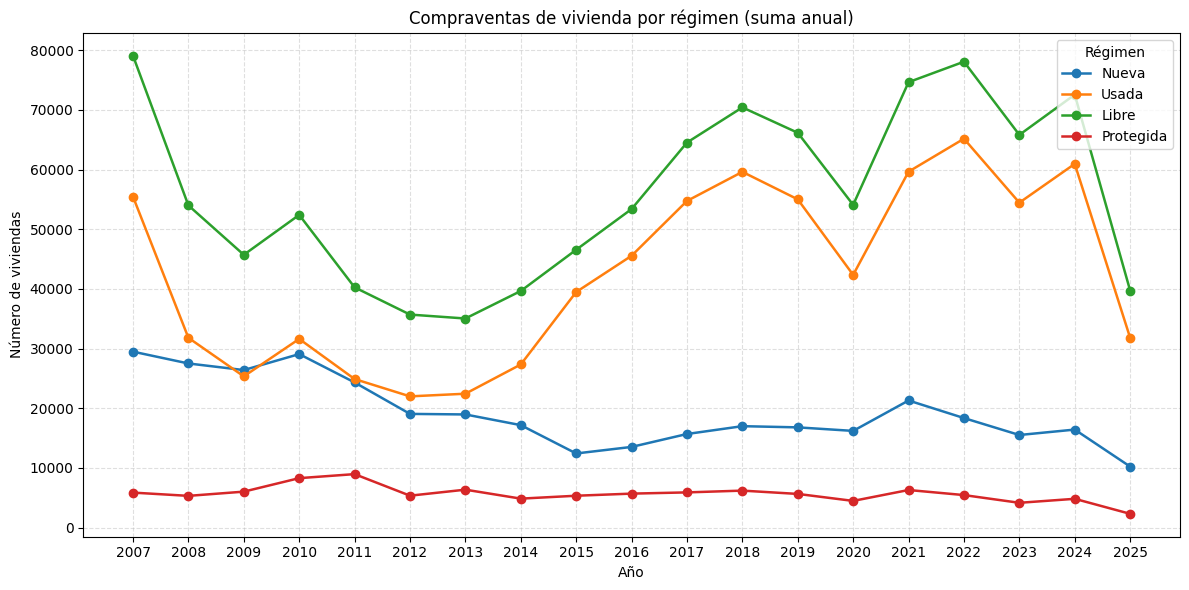

In [64]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Detectar columna de régimen y columnas mensuales ---
df = compraventa_viviendas.copy()

# Columna con el nombre del régimen (por si viene con encabezados raros)
reg_col = next((c for c in df.columns if re.search(r"r[ée]gimen", str(c), flags=re.I)), df.columns[0])
df["Regimen"] = df[reg_col].astype(str).str.strip()

# Columnas tipo 'YYYYMmm' (p. ej. 2025M06)
month_cols = [c for c in df.columns if re.match(r"^\s*\d{4}M\d{2}\s*$", str(c))]

# --- 2) Wide -> long y limpieza básica ---
long = df.melt(id_vars=["Regimen"], value_vars=month_cols,
               var_name="Periodo", value_name="Num")

long["Periodo"] = long["Periodo"].astype(str).str.strip()
long[["Año","Mes"]] = long["Periodo"].str.extract(r"(?P<Año>\d{4})M(?P<Mes>\d{2})").astype("Int64")
# fuerza a numérico por si hay celdas con puntos/comas/… 
long["Num"] = (long["Num"].astype(str)
                        .str.replace(r"\s|\u00A0", "", regex=True)
                        .str.replace(".", "", regex=False)   
                        .str.replace(",", ".", regex=False)  
              )
long["Num"] = pd.to_numeric(long["Num"], errors="coerce")

# Quitar la fila de total agregado
long = long[~long["Regimen"].str.contains("total", case=False, na=False)]

# Normalizar nombres de régimen (opcional)
long["Regimen"] = (long["Regimen"]
                   .str.replace(r"Vivienda\s+", "", regex=True)
                   .str.strip()
                   .str.capitalize())   

# --- 3) Agregar por año y régimen (suma mensual del año) ---
anual = (long.dropna(subset=["Año"])
              .groupby(["Año","Regimen"], as_index=False)["Num"]
              .sum())

# Nos quedamos con los 4 regímenes clave
regimenes = ["Nueva", "Usada", "Libre", "Protegida"]
anual = anual[anual["Regimen"].isin(regimenes)]

# --- 4) Gráfico de 4 líneas (una por régimen) ---
plt.figure(figsize=(12,6))
for r in regimenes:
    g = anual[anual["Regimen"] == r].sort_values("Año")
    if not g.empty:
        plt.plot(g["Año"], g["Num"], marker="o", linewidth=1.8, label=r)

plt.title("Compraventas de vivienda por régimen (suma anual)")
plt.xlabel("Año")
plt.ylabel("Número de viviendas")
plt.xticks(sorted(anual["Año"].unique()))
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Régimen")
plt.tight_layout()
plt.show()


## 18. Población mensual por distritos (2022) y evolución de la población

In [65]:
poblacion_distritos = pd.read_excel(
    r"C:\Users\evahr\Downloads\TFM-idealista\Población mensual por distritos.xlsx",
)

In [59]:
poblacion_distritos.columns = poblacion_distritos.columns.str.strip().str.upper()
print(poblacion_distritos.head(10))

              DISTRITO   AÑO    MES  POBLACIÓN  MES_NUM
0               Centro  2007  Enero    141.708        1
1           Arganzuela  2007  Enero    149.951        1
2               Retiro  2007  Enero    124.507        1
3            Salamanca  2007  Enero    146.841        1
4            Chamartín  2007  Enero    143.981        1
5               Tetuán  2007  Enero    152.535        1
6             Chamberí  2007  Enero    145.570        1
7  Fuencarral-El Pardo  2007  Enero    213.547        1
8      Moncloa-Aravaca  2007  Enero    117.438        1
9               Latina  2007  Enero    256.949        1


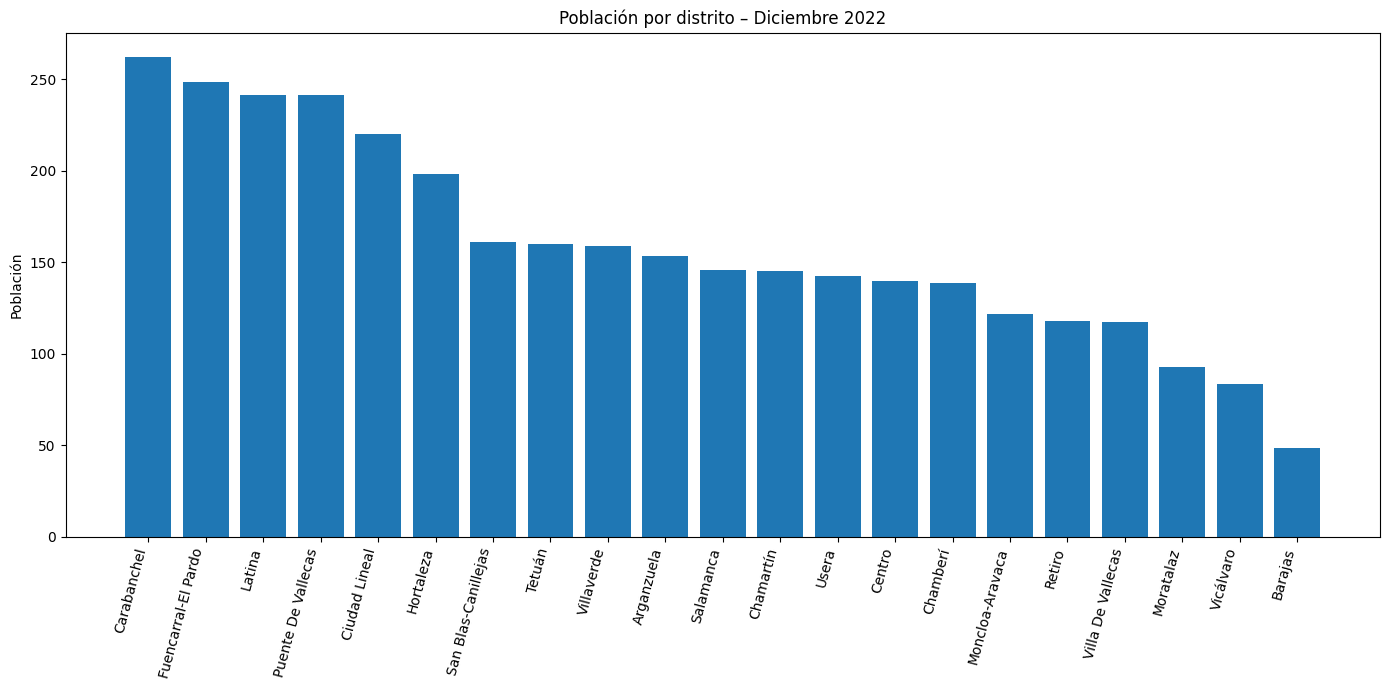

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

df = poblacion_distritos.copy()

# Asegura que POBLACIÓN sea numérica (maneja formatos tipo '141.708' o '141,708')
if df['POBLACIÓN'].dtype == 'O':
    df['POBLACIÓN'] = (df['POBLACIÓN'].astype(str)
                       .str.replace('.', '', regex=False)
                       .str.replace(',', '.', regex=False)
                       .astype(float))

# Filtra diciembre 2022 (dato final del año)
dec_2022 = df[(df['AÑO'] == 2022) & (df['MES_NUM'] == 12)][['DISTRITO','POBLACIÓN']].copy()

# Ordena por población (descendente)
dec_2022 = dec_2022.sort_values('POBLACIÓN', ascending=False)

# Gráfico de barras
plt.figure(figsize=(14,7))
plt.bar(dec_2022['DISTRITO'], dec_2022['POBLACIÓN'])
plt.title('Población por distrito – Diciembre 2022')
plt.ylabel('Población')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

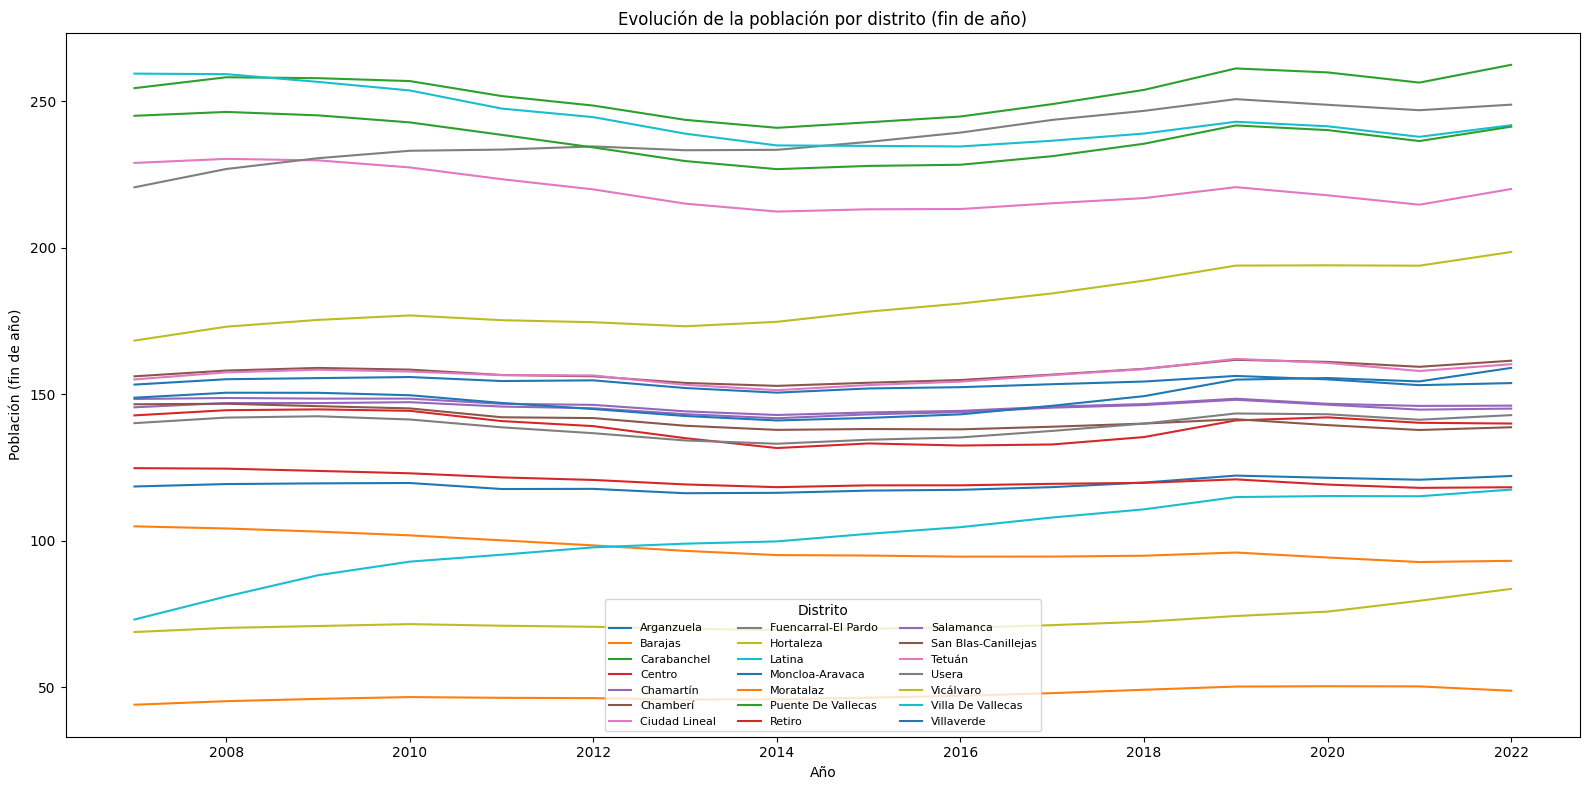

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

df = poblacion_distritos.copy()

# --- Asegura que POBLACIÓN sea numérica (maneja '141.708' o '141,708') ---
if df['POBLACIÓN'].dtype == 'O':
    df['POBLACIÓN'] = (df['POBLACIÓN'].astype(str)
                       .str.replace('.', '', regex=False)
                       .str.replace(',', '.', regex=False)
                       .astype(float))

# --- Tomamos el valor de fin de año por distrito (diciembre; si no hay, el último mes disponible) ---
df = df.sort_values(['AÑO', 'DISTRITO', 'MES_NUM'])
fin_de_anio = df.groupby(['AÑO', 'DISTRITO'], as_index=False).tail(1)

# --- Pivot: filas=años, columnas=distritos, valores=población de fin de año ---
pivot = fin_de_anio.pivot(index='AÑO', columns='DISTRITO', values='POBLACIÓN').sort_index()

# --- Gráfico de líneas (evolución por distrito a lo largo de todos los años) ---
ax = pivot.plot(figsize=(16, 8))
ax.set_title('Evolución de la población por distrito (fin de año)')
ax.set_xlabel('Año')
ax.set_ylabel('Población (fin de año)')
ax.legend(title='Distrito', ncol=3, fontsize=8)
plt.tight_layout()
plt.show()
